## 2.2 EDA Countries dataset

In [1]:
#we call the required functions for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas_datareader as dr
plt.style.use('seaborn-darkgrid')
import plotly.graph_objects as go
import plotly.express as px

from MC_FP_UsefulFunctions import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
#files location:
os.chdir(r'/Users/marike/Documents/MARIKE/DATA SCIENCE/Final project/Marike FP/Data')

"""indicate in below code line (convert comment to code) the location of Speed Dating Data 
in case of checking the project from another computer"""
# os.chdir("..")

'indicate in below code line (convert comment to code) the location of Speed Dating Data \nin case of checking the project from another computer'

In [3]:
waste_generation_countries_path = r'CountriesWasteGeneration.csv'
waste_countries_df = pd.read_csv(waste_generation_countries_path)

In [4]:
waste_countries_df.head()

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab
0,ABW,LCN,HighIncome,no,yes,yes,yes,103187.0,8.813202e+04,0.0,11.0,35895.513016
1,AFG,SAS,LowIncome,no,yes,yes,yes,34656032.0,5.628525e+06,0.0,0.0,617.890000
2,AGO,SSF,LowMiddleIncome,no,no,yes,yes,25096150.0,4.213644e+06,0.0,0.0,4105.900000
3,ALB,ECS,MiddleUpperIncome,no,yes,yes,yes,2880703.0,1.142964e+06,0.0,0.0,4676.320000
4,AND,ECS,HighIncome,no,yes,yes,yes,82431.0,4.300000e+04,0.0,0.0,40274.660000


In [5]:
waste_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
country_code                 215 non-null object
region_id                    215 non-null object
income_id                    215 non-null object
info_system_SW_mgmt          215 non-null object
national_waste_agency        215 non-null object
national_law_for_SW_mgmt     215 non-null object
PPP_rules_and_regulations    215 non-null object
population                   215 non-null float64
MSW_generated_tons_year      215 non-null float64
compost_percent              215 non-null float64
recycling_percent            215 non-null float64
gdp_inhab                    215 non-null float64
dtypes: float64(5), object(7)
memory usage: 20.3+ KB


In [6]:
len(waste_countries_df.country_code.unique())

215

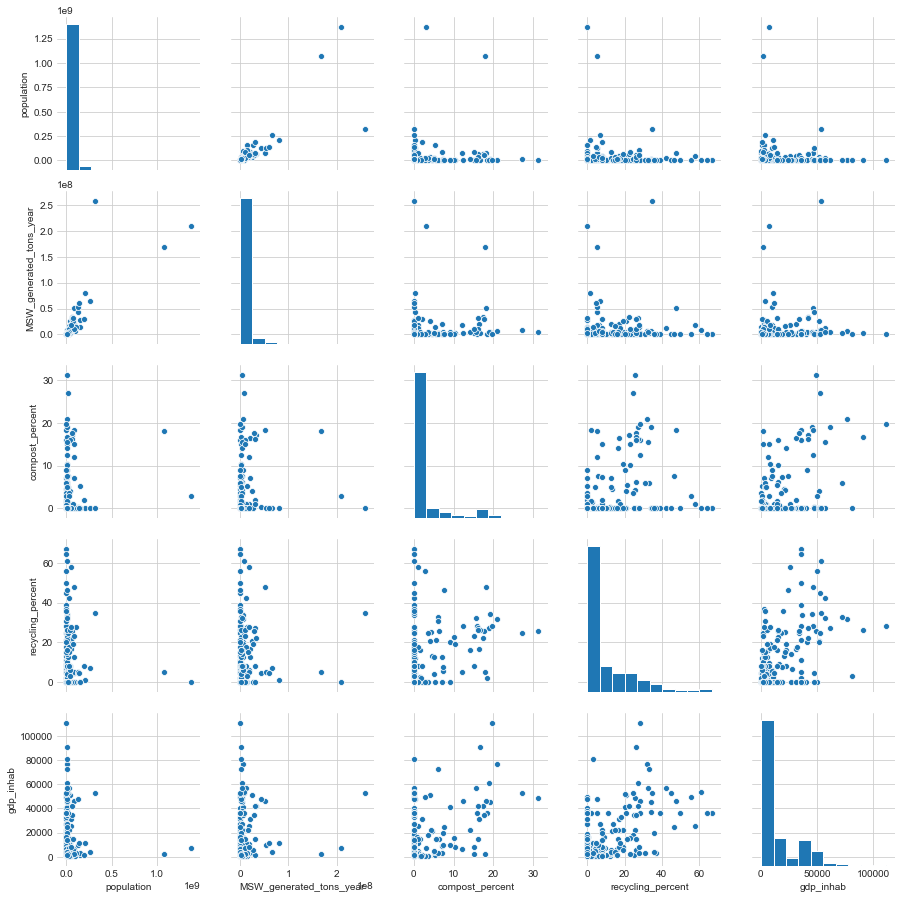

In [7]:
sns.set_style("whitegrid")
sns.pairplot(waste_countries_df)

In [8]:
waste_countries_df.describe()

,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab
count,2.150000e+02,2.150000e+02,215.000000,215.000000,215.000000
mean,3.241676e+07,8.582534e+06,2.573892,10.018950,15774.535949
std,1.238072e+08,2.714256e+07,5.696282,14.397462,19361.614633
min,1.109700e+04,3.989486e+03,0.000000,0.000000,331.440000
25%,7.619900e+05,2.138795e+05,0.000000,0.000000,2191.160000
50%,5.737723e+06,1.768977e+06,0.000000,2.500000,6989.250000
75%,2.137250e+07,4.865910e+06,1.000000,16.580000,23461.690000
max,1.371220e+09,2.580000e+08,31.240000,67.000000,110967.030000


In [9]:
waste_countries_df['Waste_by_country_inhabitant_kg_year']=round(waste_countries_df['MSW_generated_tons_year']*1000/waste_countries_df['population'],2)

In [10]:
waste_countries_df.describe()

,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab,Waste_by_country_inhabitant_kg_year
count,2.150000e+02,2.150000e+02,215.000000,215.000000,215.000000,215.000000
mean,3.241676e+07,8.582534e+06,2.573892,10.018950,15774.535949,377.875209
std,1.238072e+08,2.714256e+07,5.696282,14.397462,19361.614633,276.745995
min,1.109700e+04,3.989486e+03,0.000000,0.000000,331.440000,37.370000
25%,7.619900e+05,2.138795e+05,0.000000,0.000000,2191.160000,168.735000
50%,5.737723e+06,1.768977e+06,0.000000,2.500000,6989.250000,316.040000
75%,2.137250e+07,4.865910e+06,1.000000,16.580000,23461.690000,485.420000
max,1.371220e+09,2.580000e+08,31.240000,67.000000,110967.030000,1586.990000


In [11]:
waste_countries_df.income_id.unique()

array(['HighIncome', 'LowIncome', 'LowMiddleIncome', 'MiddleUpperIncome'],
      dtype=object)

In [12]:
replace_income = {'HighIncome': 4, 'MiddleUpperIncome': 3, 'LowMiddleIncome': 2, 'LowIncome': 1}
df_countries = waste_countries_df.copy()
df_countries['NumIncome']=df_countries.income_id.copy()
df_countries['NumIncome'].replace(replace_income, inplace=True)
df_countries

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab,Waste_by_country_inhabitant_kg_year,NumIncome
0,ABW,LCN,HighIncome,no,yes,yes,yes,103187.00,8.813202e+04,0.0,11.0,35895.513016,854.10,4
1,AFG,SAS,LowIncome,no,yes,yes,yes,34656032.00,5.628525e+06,0.0,0.0,617.890000,162.41,1
2,AGO,SSF,LowMiddleIncome,no,no,yes,yes,25096150.00,4.213644e+06,0.0,0.0,4105.900000,167.90,2
3,ALB,ECS,MiddleUpperIncome,no,yes,yes,yes,2880703.00,1.142964e+06,0.0,0.0,4676.320000,396.77,3
4,AND,ECS,HighIncome,no,yes,yes,yes,82431.00,4.300000e+04,0.0,0.0,40274.660000,521.65,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,XKX,ECS,LowMiddleIncome,yes,yes,yes,yes,1801800.00,3.190000e+05,0.0,0.0,3956.750000,177.05,2
211,YEM,MEA,LowIncome,no,yes,yes,no,27584213.00,4.836820e+06,0.0,8.0,432.390000,175.35,1
212,ZAF,SSF,MiddleUpperIncome,yes,yes,yes,no,51729345.36,1.845723e+07,0.0,28.0,8142.550000,356.80,3
213,ZMB,SSF,LowMiddleIncome,no,no,yes,no,14264756.00,2.608268e+06,0.0,0.0,1895.380000,182.85,2


In [13]:
df_countries.sort_values(by='NumIncome',ascending=True)

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab,Waste_by_country_inhabitant_kg_year,NumIncome
214,ZWE,SSF,LowIncome,no,no,yes,no,12500525.0,1.449752e+06,0.00,16.00,1185.470000,115.98,1
58,ERI,SSF,LowIncome,no,no,no,no,4474690.0,7.269574e+05,0.00,0.00,743.645517,162.46,1
176,SSD,SSF,LowIncome,no,no,no,no,11177490.0,2.680681e+06,0.00,0.00,743.645517,239.83,1
123,MDG,SSF,LowIncome,no,no,yes,yes,24894551.0,3.768759e+06,3.50,0.00,416.000000,151.39,1
171,SLE,SSF,LowIncome,no,no,no,no,5439695.0,6.102221e+05,0.00,0.00,616.830000,112.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,CHE,ECS,HighIncome,no,yes,yes,no,8372098.0,6.056000e+06,21.00,32.00,76694.000000,723.36,4
149,OMN,MEA,HighIncome,no,yes,yes,yes,3960925.0,1.734885e+06,0.00,0.00,18948.690000,438.00,4
148,NZL,EAS,HighIncome,yes,yes,yes,yes,4692700.0,3.405000e+06,0.00,0.00,37532.460000,725.60,4
158,PRT,ECS,HighIncome,yes,yes,yes,yes,10401062.0,4.710000e+06,14.12,16.23,22280.920000,452.84,4


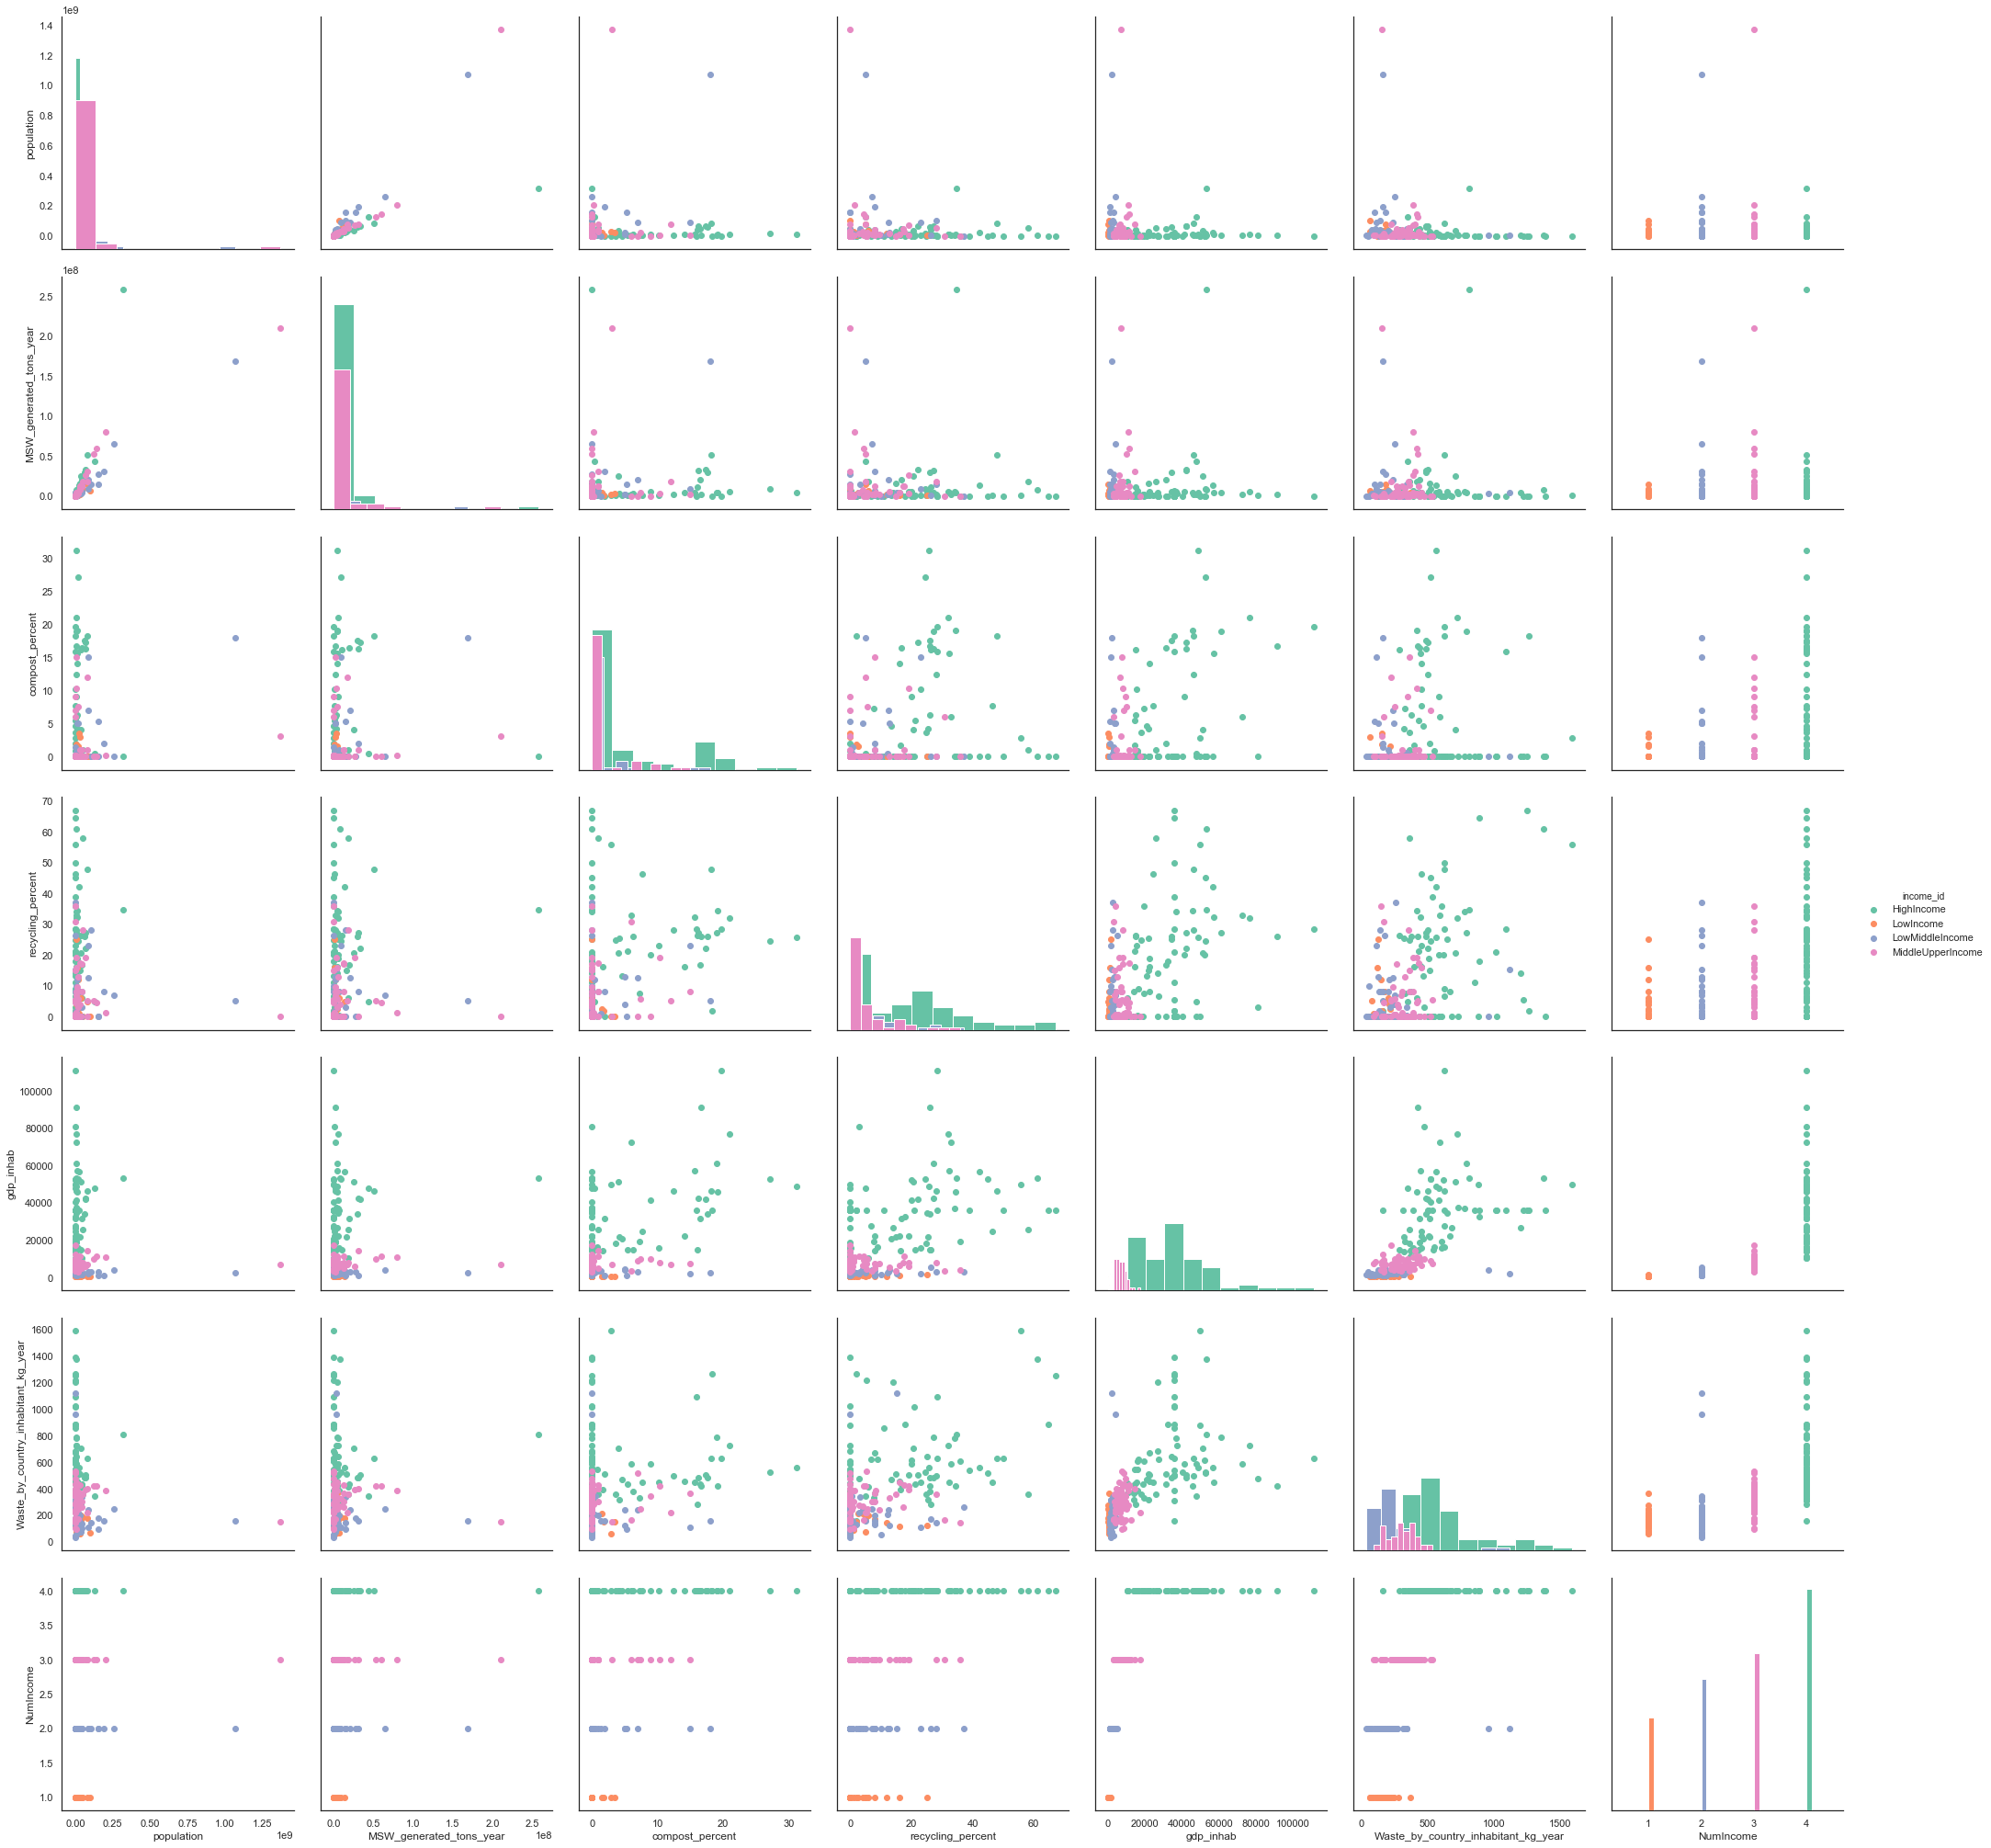

In [14]:
sns.set(style="white", palette="Set2")

g = sns.PairGrid(df_countries, hue="income_id", height=4)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

Text(0.5, 1.0, 'Distribution of waste generation by inhabitant in countries based on countries dataset')

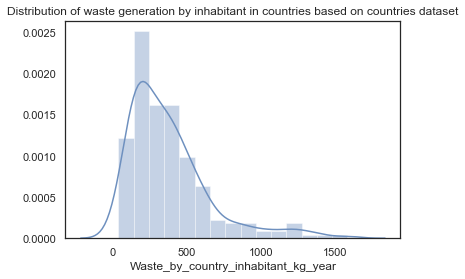

In [15]:
sns.set(style="white", palette="vlag", color_codes=True)

sns.distplot(df_countries['Waste_by_country_inhabitant_kg_year']).set_title(('Distribution of waste generation by inhabitant in countries based on countries dataset'))

In [16]:
df_countries["WasteLog"] = np.log1p(df_countries["Waste_by_country_inhabitant_kg_year"])

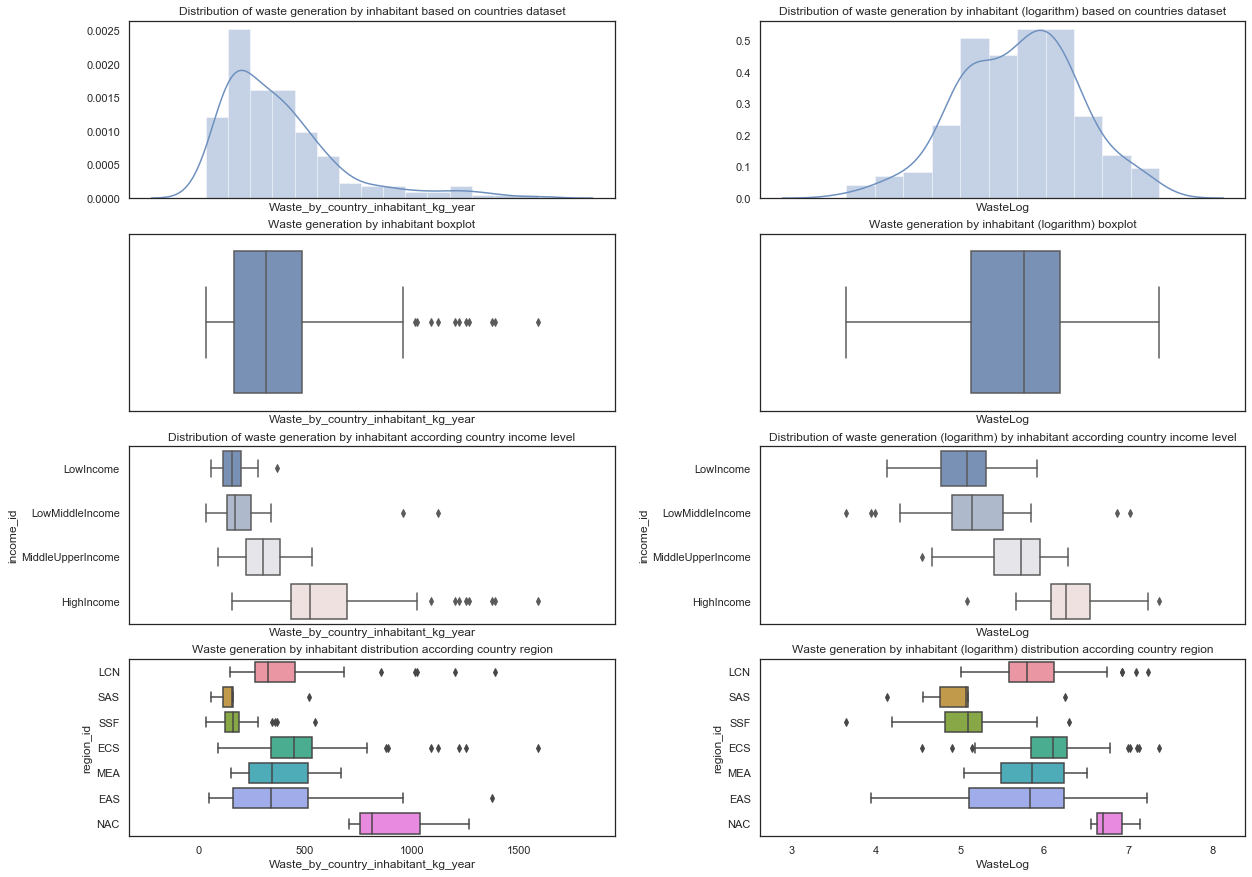

In [17]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20, 15),sharex='col')
fig.subplots_adjust(wspace=.3)

sns.distplot(df_countries['Waste_by_country_inhabitant_kg_year'],ax=axes[0,0]).set_title(('Distribution of waste generation by inhabitant based on countries dataset'))
sns.boxplot(df_countries['Waste_by_country_inhabitant_kg_year'],ax=axes[1,0]).set_title(('Waste generation by inhabitant boxplot'))
sns.boxplot(data=df_countries.sort_values(by='NumIncome', ascending=True),x='Waste_by_country_inhabitant_kg_year', y="income_id",ax=axes[2,0]).set_title(('Distribution of waste generation by inhabitant according country income level'))
sns.boxplot(data=df_countries,x='Waste_by_country_inhabitant_kg_year', y="region_id",ax=axes[3,0]).set_title('Waste generation by inhabitant distribution according country region')

sns.distplot(df_countries['WasteLog'],ax=axes[0,1]).set_title(('Distribution of waste generation by inhabitant (logarithm) based on countries dataset'))
sns.boxplot(df_countries['WasteLog'],ax=axes[1,1]).set_title(('Waste generation by inhabitant (logarithm) boxplot'))
sns.boxplot(data=df_countries.sort_values(by='NumIncome', ascending=True),x='WasteLog', y="income_id",ax=axes[2,1]).set_title(('Distribution of waste generation (logarithm) by inhabitant according country income level'))
sns.boxplot(data=df_countries,x='WasteLog', y="region_id",ax=axes[3,1]).set_title('Waste generation by inhabitant (logarithm) distribution according country region')

fig.savefig("plots_wasteLog_distr_countries.png", bbox_inches="tight") 

Text(0.5, 1.0, 'Distribution of population')

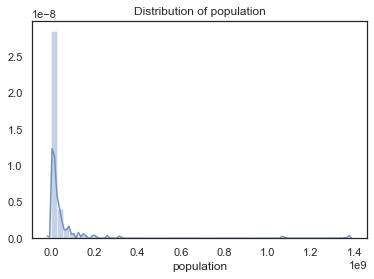

In [18]:
sns.distplot(df_countries['population']).set_title(('Distribution of population'))

Text(0.5, 1.0, 'Distribution of GDP by inhabitant')

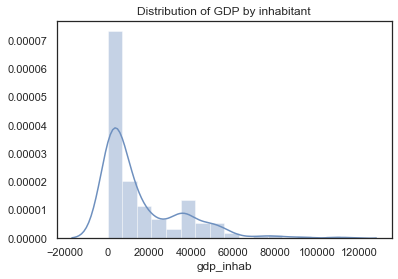

In [19]:
sns.distplot(df_countries['gdp_inhab']).set_title(('Distribution of GDP by inhabitant'))

In [20]:
df_countries["PopLog"] = np.log1p(df_countries["population"])

In [21]:
df_countries["gdp_inhab_log"] = np.log1p(df_countries["gdp_inhab"])

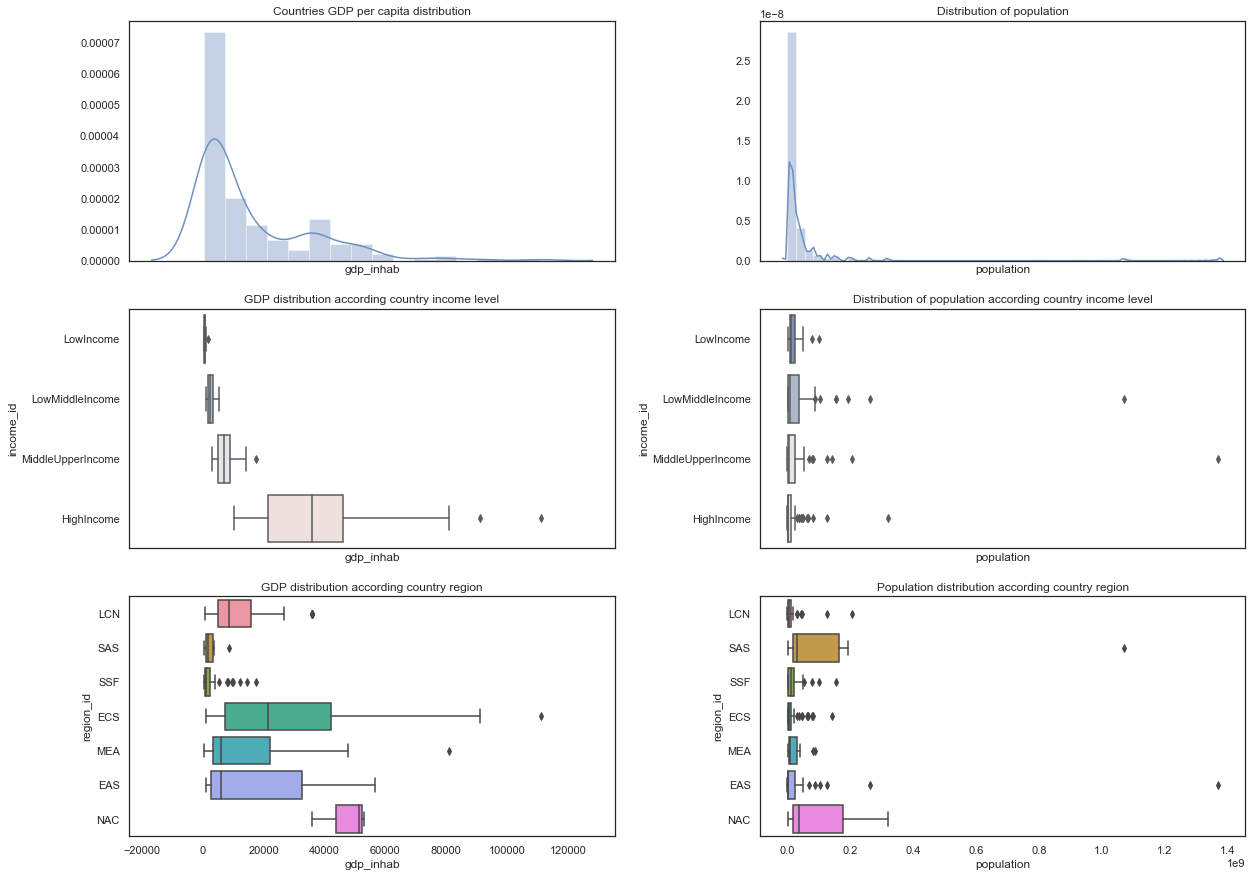

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20, 15),sharex='col')
fig.subplots_adjust(wspace=.3)

sns.distplot(df_countries['gdp_inhab'],ax=axes[0,0]).set_title('Countries GDP per capita distribution')
sns.boxplot(data=df_countries.sort_values(by='NumIncome',ascending=True),x='gdp_inhab', y="income_id",ax=axes[1,0]).set_title('GDP distribution according country income level')
sns.boxplot(data=df_countries,x='gdp_inhab', y="region_id",ax=axes[2,0]).set_title('GDP distribution according country region')

sns.distplot(df_countries['population'],ax=axes[0,1]).set_title(('Distribution of population'))
sns.boxplot(data=df_countries.sort_values(by='NumIncome', ascending=True),x='population', y="income_id",ax=axes[1,1]).set_title(('Distribution of population according country income level'))
sns.boxplot(data=df_countries,x='population', y="region_id",ax=axes[2,1]).set_title('Population distribution according country region')

fig.savefig("plots_gdp_population_countries.png", bbox_inches="tight") 

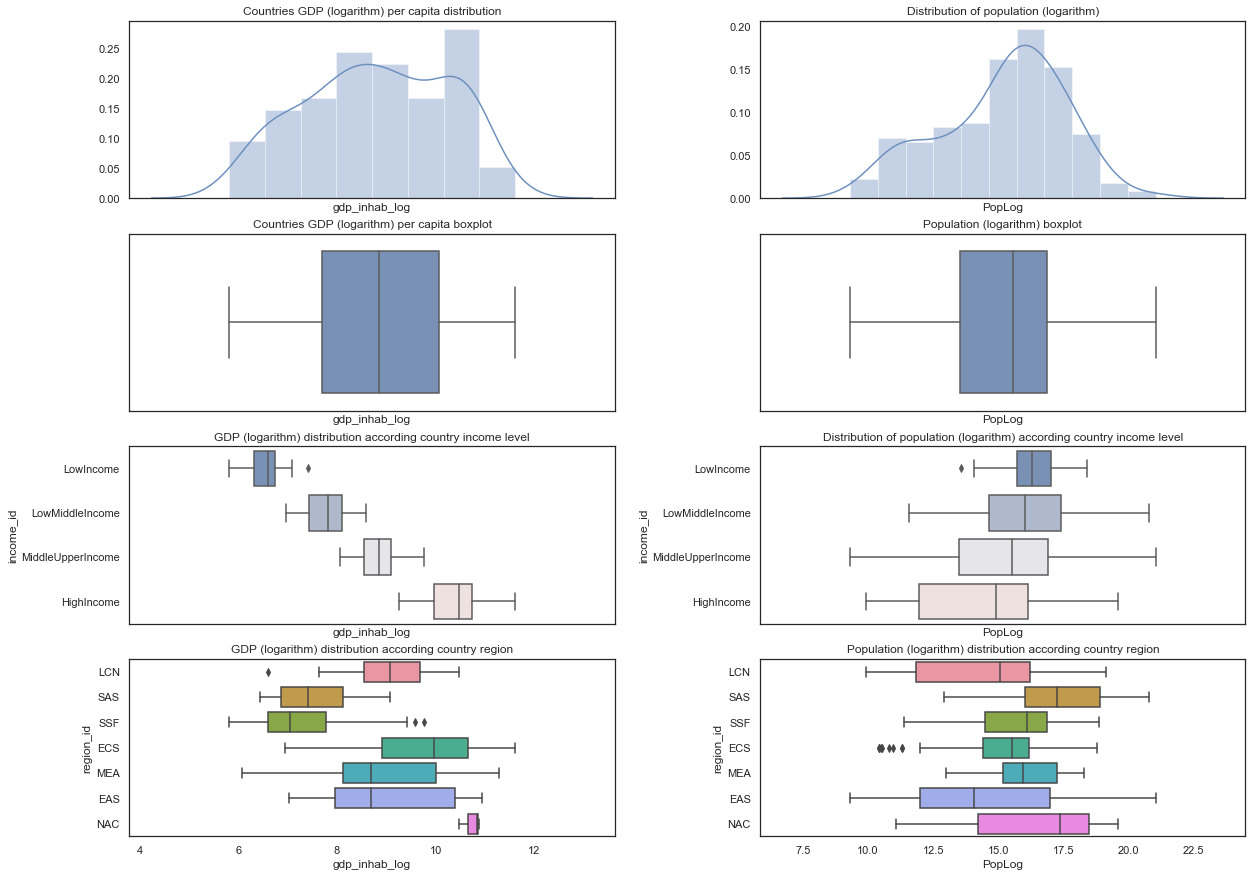

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20, 15),sharex='col')
fig.subplots_adjust(wspace=.3)

sns.distplot(df_countries['gdp_inhab_log'],ax=axes[0,0]).set_title('Countries GDP (logarithm) per capita distribution')
sns.boxplot(df_countries['gdp_inhab_log'], orient='h',ax=axes[1,0]).set_title('Countries GDP (logarithm) per capita boxplot')
sns.boxplot(data=df_countries.sort_values(by='NumIncome',ascending=True),x='gdp_inhab_log', y="income_id",ax=axes[2,0]).set_title('GDP (logarithm) distribution according country income level')
sns.boxplot(data=df_countries,x='gdp_inhab_log', y="region_id",ax=axes[3,0]).set_title('GDP (logarithm) distribution according country region')

sns.distplot(df_countries['PopLog'],ax=axes[0,1]).set_title(('Distribution of population (logarithm)'))
sns.boxplot(df_countries['PopLog'], orient='h',ax=axes[1,1]).set_title(('Population (logarithm) boxplot'))
sns.boxplot(data=df_countries.sort_values(by='NumIncome', ascending=True),x='PopLog', y="income_id",ax=axes[2,1]).set_title(('Distribution of population (logarithm) according country income level'))
sns.boxplot(data=df_countries,x='PopLog', y="region_id",ax=axes[3,1]).set_title('Population (logarithm) distribution according country region')

fig.savefig("plots_gdp_population_LOG_countries.png", bbox_inches="tight") 

In [24]:
countries_by_income = df_countries[['income_id','population','MSW_generated_tons_year']].groupby('income_id').sum()
countries_by_income=countries_by_income.rename(columns={'population':'pop_by_income','MSW_generated_tons_year':'tons_waste_income'})
countries_by_income['percent_pop']=round(countries_by_income['pop_by_income']*100/countries_by_income['pop_by_income'].sum(),2)
countries_by_income['percent_waste']=round(countries_by_income['tons_waste_income']*100/countries_by_income['tons_waste_income'].sum(),2)
countries_by_income=countries_by_income.sort_values(by='percent_waste',ascending=True)

In [25]:
countries_by_income

,pop_by_income,tons_waste_income,percent_pop,percent_waste
income_id,,,,
LowIncome,6.321418e+08,9.451639e+07,9.07,5.12
LowMiddleIncome,2.581948e+09,4.370172e+08,37.05,23.68
MiddleUpperIncome,2.526506e+09,6.205790e+08,36.25,33.63
HighIncome,1.229006e+09,6.931321e+08,17.63,37.56


In [117]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=countries_by_income.index.tolist(),
    y=countries_by_income.percent_pop.tolist(),
    name='Population Percentage',
    marker_color='darkblue'
))
fig.add_trace(go.Bar(
    x=countries_by_income.index.tolist(),
    y=countries_by_income.percent_waste.tolist(),
    name='Waste Generation Percentage',
    marker_color='orange'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', title="Percentage of population and waste generation by income level", xaxis_tickangle=-45, yaxis_title="%", font=dict(
        family="Arial",
        size=12,
        color="#7f7f7f")
)

fig.show()

In [27]:
show_cat_values(df_countries,[''])

country_code  ,  ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM'
 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAF'
 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE'
 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG'
 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'PY

In [28]:
df_countries.columns

Index(['country_code', 'region_id', 'income_id', 'info_system_SW_mgmt',
       'national_waste_agency', 'national_law_for_SW_mgmt',
       'PPP_rules_and_regulations', 'population', 'MSW_generated_tons_year',
       'compost_percent', 'recycling_percent', 'gdp_inhab',
       'Waste_by_country_inhabitant_kg_year', 'NumIncome', 'WasteLog',
       'PopLog', 'gdp_inhab_log'],
      dtype='object')

In [29]:
Categorical_var_4counting=['region_id', 'income_id', 'info_system_SW_mgmt',
       'national_waste_agency', 'national_law_for_SW_mgmt',
       'PPP_rules_and_regulations']

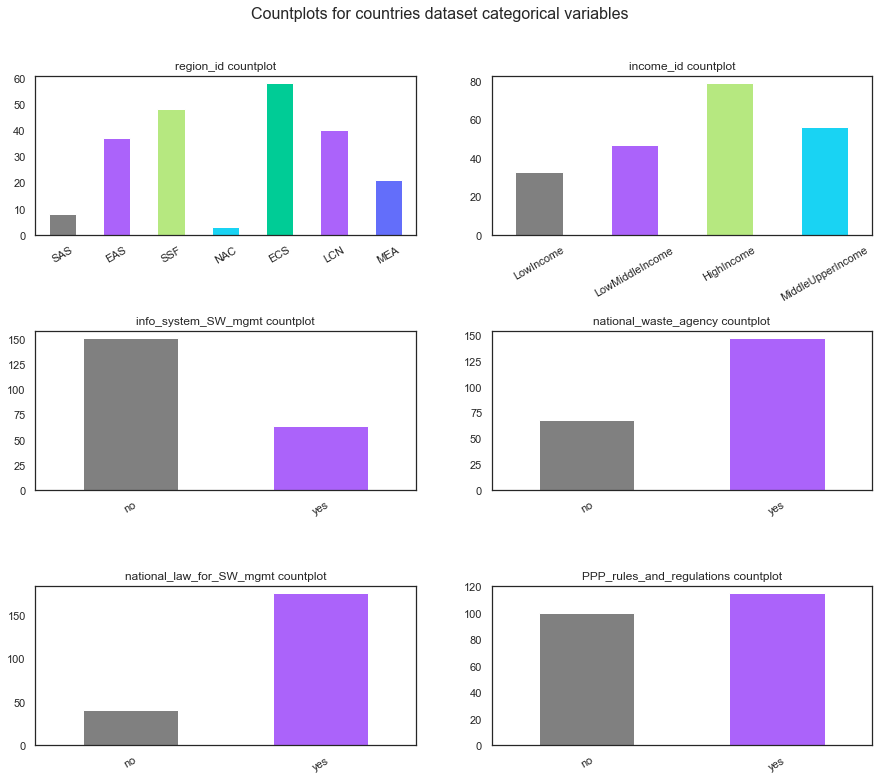

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Countplots for countries dataset categorical variables', fontsize=16)
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(hspace=.6)


for i, column in enumerate(df_countries[Categorical_var_4counting].columns):
    pd.value_counts(df_countries[column],sort=False).plot(rot=30,kind='bar',title=(column+' countplot'),ax=axes[i//2,i%2],color=['grey', '#AB63FA','#B6E880', '#19D3F3', '#00CC96', '#AB63FA','#636EFA'])
                                                                                                                                
    
plt.savefig('countplot_categorical_var_countries.png', bbox_inches='tight')    

In [31]:
# For variable with yes/no value, we convert yes = 1 and no = 0 to make counting easier with the function binary_encoding. 
binary_encoding(df_countries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
country_code                           215 non-null object
region_id                              215 non-null object
income_id                              215 non-null object
info_system_SW_mgmt                    215 non-null int64
national_waste_agency                  215 non-null int64
national_law_for_SW_mgmt               215 non-null int64
PPP_rules_and_regulations              215 non-null int64
population                             215 non-null float64
MSW_generated_tons_year                215 non-null float64
compost_percent                        215 non-null float64
recycling_percent                      215 non-null float64
gdp_inhab                              215 non-null float64
Waste_by_country_inhabitant_kg_year    215 non-null float64
NumIncome                              215 non-null int64
WasteLog                               215 non-null float64
PopLog  

## Study of correlation between variables for possible modelling for waste generation

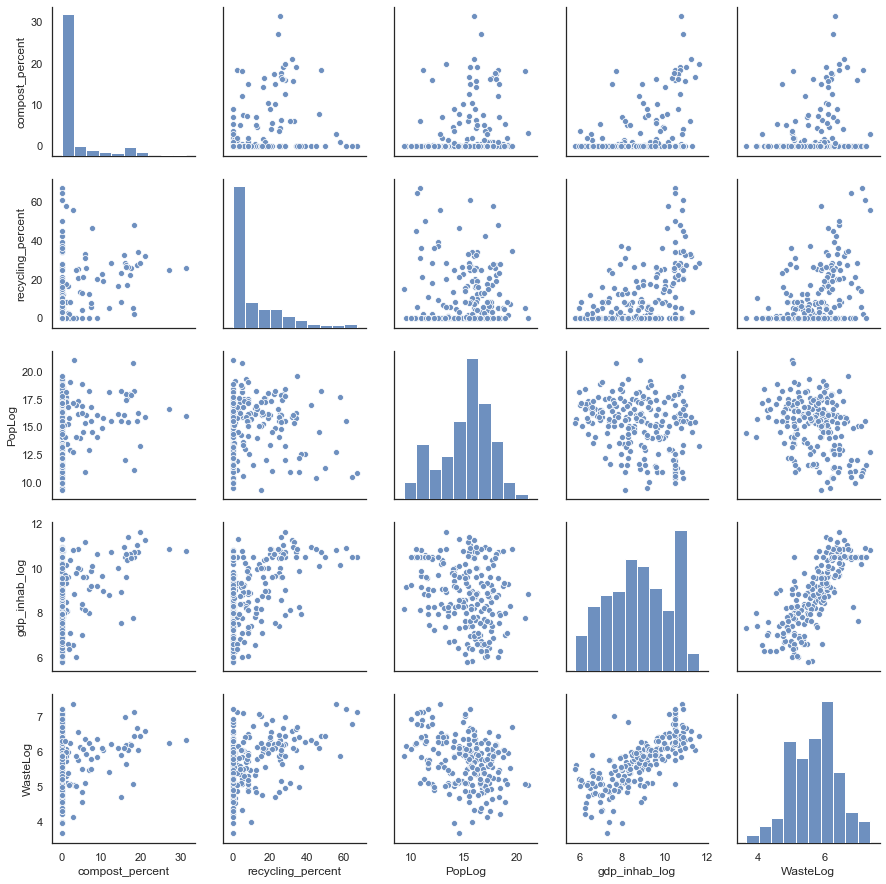

In [32]:
sns.pairplot(df_countries[['compost_percent', 'recycling_percent',
        'PopLog', 'gdp_inhab_log', 'WasteLog']])

**ENCODING OF REGION AND INCOME VARIABLES**

In [33]:
df_countries_encoded = df_countries.copy()

df_countries_encoded.columns

Index(['country_code', 'region_id', 'income_id', 'info_system_SW_mgmt',
       'national_waste_agency', 'national_law_for_SW_mgmt',
       'PPP_rules_and_regulations', 'population', 'MSW_generated_tons_year',
       'compost_percent', 'recycling_percent', 'gdp_inhab',
       'Waste_by_country_inhabitant_kg_year', 'NumIncome', 'WasteLog',
       'PopLog', 'gdp_inhab_log'],
      dtype='object')

In [34]:
df_countries_encoded = df_countries_encoded.drop(['country_code','MSW_generated_tons_year','population','Waste_by_country_inhabitant_kg_year',"NumIncome",'gdp_inhab'],axis=1)
df_countries_encoded

,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log
0,LCN,HighIncome,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395
1,SAS,LowIncome,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928
2,SSF,LowMiddleIncome,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424
3,ECS,MiddleUpperIncome,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481
4,ECS,HighIncome,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503
...,...,...,...,...,...,...,...,...,...,...,...
210,ECS,LowMiddleIncome,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431
211,MEA,LowIncome,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638
212,SSF,MiddleUpperIncome,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981
213,SSF,LowMiddleIncome,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702


**CODING TYPE: 1.ONE HOT ENCODING**

In [35]:
df_countries_encoded_ohe = df_countries_encoded.copy()

In [36]:
df_countries_encoded_ohe.income_id.replace({'HighIncome': 'HI', 'MiddleUpperIncome': 'UMI', 'LowMiddleIncome': 'LMI', 'LowIncome': 'LI'},inplace=True)
df_countries_encoded_ohe

,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log
0,LCN,HI,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395
1,SAS,LI,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928
2,SSF,LMI,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424
3,ECS,UMI,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481
4,ECS,HI,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503
...,...,...,...,...,...,...,...,...,...,...,...
210,ECS,LMI,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431
211,MEA,LI,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638
212,SSF,UMI,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981
213,SSF,LMI,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702


Encoding of region_id with One Hot Encoding method.
The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting the values improperly.

In [37]:
df_countries_encoded_ohe = pd.get_dummies(df_countries_encoded, columns=['region_id'], prefix = ['region'])
df_countries_encoded_ohe = pd.get_dummies(df_countries_encoded_ohe, columns=['income_id'], prefix = ['income'])

In [38]:
df_countries_encoded_ohe

,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log,region_EAS,region_ECS,region_LCN,region_MEA,region_NAC,region_SAS,region_SSF,income_HighIncome,income_LowIncome,income_LowMiddleIncome,income_MiddleUpperIncome
0,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395,0,0,1,0,0,0,0,1,0,0,0
1,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928,0,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424,0,0,0,0,0,0,1,0,0,1,0
3,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481,0,1,0,0,0,0,0,0,0,0,1
4,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431,0,1,0,0,0,0,0,0,0,1,0
211,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638,0,0,0,1,0,0,0,0,1,0,0
212,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981,0,0,0,0,0,0,1,0,0,0,1
213,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702,0,0,0,0,0,0,1,0,0,1,0


In [39]:
corrMatrix = df_countries_encoded_ohe.corr()
corrMatrix['WasteLog'].sort_values(ascending=False)

WasteLog                     1.000000
gdp_inhab_log                0.755587
income_HighIncome            0.692593
recycling_percent            0.429820
region_ECS                   0.329244
national_waste_agency        0.324791
info_system_SW_mgmt          0.314467
compost_percent              0.228460
national_law_for_SW_mgmt     0.219582
region_NAC                   0.186852
region_LCN                   0.139512
region_MEA                   0.070248
PPP_rules_and_regulations    0.030887
region_EAS                  -0.008979
income_MiddleUpperIncome    -0.048462
region_SAS                  -0.192924
PopLog                      -0.335282
income_LowMiddleIncome      -0.397067
income_LowIncome            -0.412053
region_SSF                  -0.488172
Name: WasteLog, dtype: float64

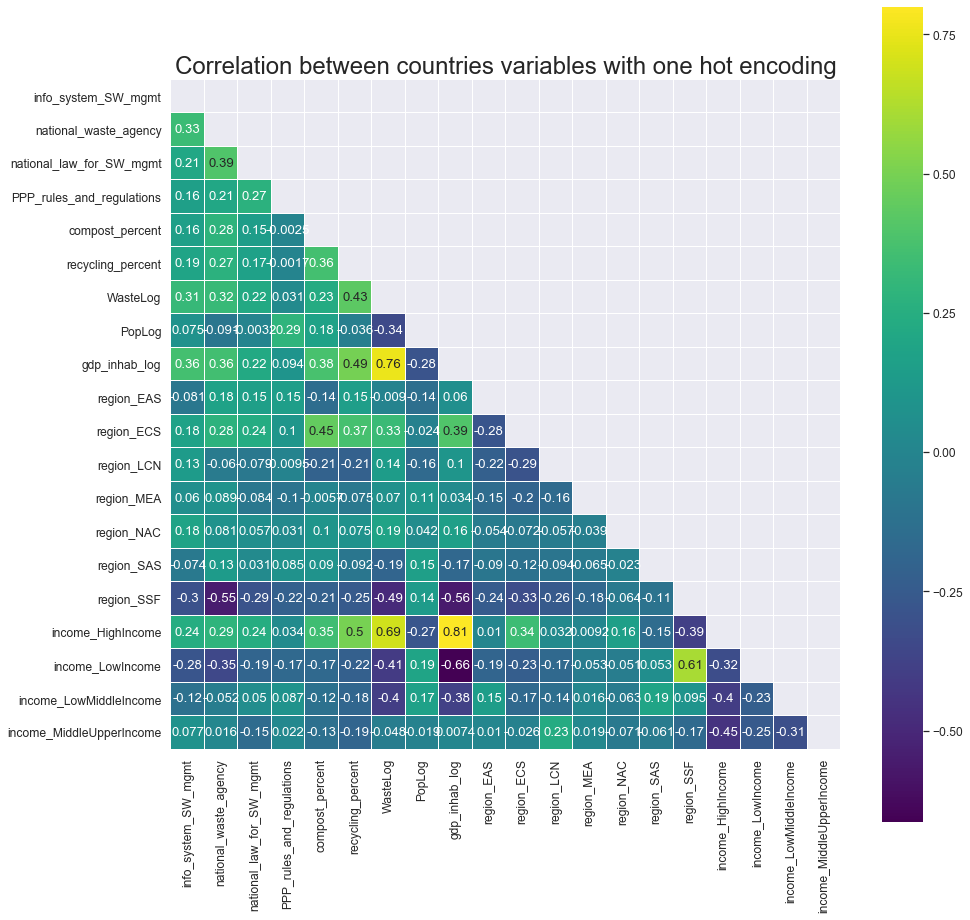

In [40]:
mask = np.zeros_like(corrMatrix)

mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

ax = sns.heatmap(corrMatrix,mask=mask, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation between countries variables with one hot encoding',fontsize=24)

plt.savefig('CorrelationCountriesVarOHE.png', bbox_inches='tight')    


**CODING TYPE: 2.LABEL ENCODING**

In [41]:
df_countries_encoded_lb = df_countries_encoded.copy()
df_countries_encoded_lb

,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log
0,LCN,HighIncome,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395
1,SAS,LowIncome,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928
2,SSF,LowMiddleIncome,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424
3,ECS,MiddleUpperIncome,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481
4,ECS,HighIncome,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503
...,...,...,...,...,...,...,...,...,...,...,...
210,ECS,LowMiddleIncome,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431
211,MEA,LowIncome,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638
212,SSF,MiddleUpperIncome,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981
213,SSF,LowMiddleIncome,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702


In [42]:
from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
df_countries_encoded_lb['region'] = lb_make.fit_transform(df_countries_encoded_lb['region_id'])
df_countries_encoded_lb['income'] = lb_make.fit_transform(df_countries_encoded_lb['income_id'])

df_countries_encoded_lb.head() #Results in appending a new column to df

,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log,region,income
0,LCN,HighIncome,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395,2,0
1,SAS,LowIncome,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928,5,1
2,SSF,LowMiddleIncome,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424,6,2
3,ECS,MiddleUpperIncome,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481,1,3
4,ECS,HighIncome,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503,1,0


In [43]:
df_countries_encoded_lb.drop(['region_id','income_id'],axis=1, inplace=True)
df_countries_encoded_lb

,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log,region,income
0,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395,2,0
1,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928,5,1
2,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424,6,2
3,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481,1,3
4,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503,1,0
...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431,1,2
211,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638,3,1
212,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981,6,3
213,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702,6,2


In [44]:
df_countries_encoded_lb.columns

Index(['info_system_SW_mgmt', 'national_waste_agency',
       'national_law_for_SW_mgmt', 'PPP_rules_and_regulations',
       'compost_percent', 'recycling_percent', 'WasteLog', 'PopLog',
       'gdp_inhab_log', 'region', 'income'],
      dtype='object')

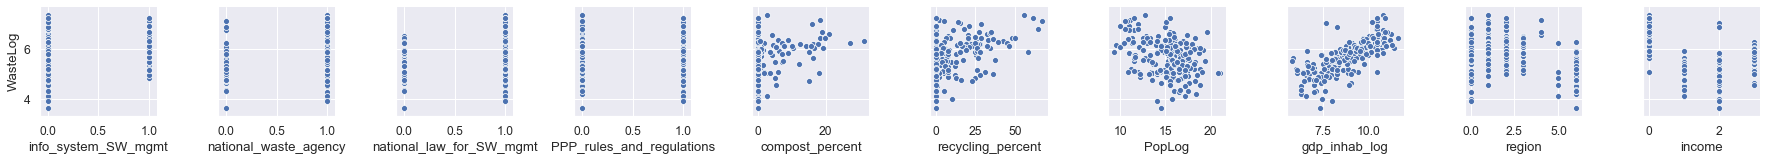

In [45]:
sns.pairplot(data=df_countries_encoded_lb, x_vars=('info_system_SW_mgmt', 'national_waste_agency',
       'national_law_for_SW_mgmt', 'PPP_rules_and_regulations',
       'compost_percent', 'recycling_percent', 'PopLog',
       'gdp_inhab_log', 'region', 'income'),y_vars='WasteLog')

plt.savefig("pairplotWasteLog.png")

In [46]:
corrMatrix_lb = df_countries_encoded_lb.corr()
corrMatrix_lb['WasteLog'].sort_values(ascending=False)

WasteLog                     1.000000
gdp_inhab_log                0.755587
recycling_percent            0.429820
national_waste_agency        0.324791
info_system_SW_mgmt          0.314467
compost_percent              0.228460
national_law_for_SW_mgmt     0.219582
PPP_rules_and_regulations    0.030887
PopLog                      -0.335282
income                      -0.442918
region                      -0.457523
Name: WasteLog, dtype: float64

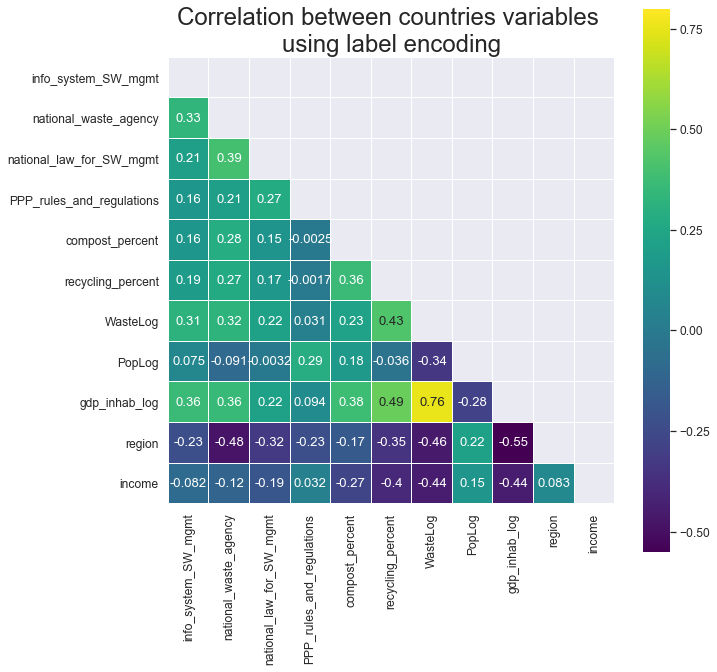

In [47]:
mask_lb = np.zeros_like(corrMatrix_lb)

mask_lb[np.triu_indices_from(mask_lb)] = True

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

ax = sns.heatmap(corrMatrix_lb,mask=mask_lb, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation between countries variables \nusing label encoding',fontsize=24)

plt.savefig('CorrelationCountriesVarLabelEncoding.png', bbox_inches='tight')   

Correlation is very high between waste and gdp but it is not so clear with other variables.
We discard compost percent for having a low correlation and income because it is related to gdp and its correlation with waste is not so high.
So finally for modelling we decide to keep only the region and gdp parameters.

In [48]:
df_countries_encoded_lb

,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log,region,income
0,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395,2,0
1,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928,5,1
2,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424,6,2
3,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481,1,3
4,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503,1,0
...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0.0,0.0,5.182064,14.404297,8.283431,1,2
211,0,1,1,0,0.0,8.0,5.172471,17.132754,6.071638,3,1
212,1,1,1,0,0.0,28.0,5.879974,17.761536,9.004981,6,3
213,0,0,1,0,0.0,0.0,5.214120,16.473303,7.547702,6,2


In [49]:
df_countries_for_model = df_countries_encoded_lb[['WasteLog','gdp_inhab_log','region']]

In [50]:
df_countries_encoded_lb.to_csv('CountriesDF_model_allvariables.csv', index=False)

In [51]:
df_countries_for_model.to_csv('CountriesDFforModelling.csv', index=False)

We have created our dataset to train our prediction capacities but we also want to work on the data visualization on maps to have a better understanding of the informaytion provided by our dataset.

So we carry on with data analysis and visualization.

In [52]:
df_countries['percent_pop_dataset']=round(df_countries['population']*100/df_countries['population'].sum(),2)

df_countries = df_countries.sort_values(by=['percent_pop_dataset'], ascending=False)
df_countries

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab,Waste_by_country_inhabitant_kg_year,NumIncome,WasteLog,PopLog,gdp_inhab_log,percent_pop_dataset
36,CHN,EAS,MiddleUpperIncome,0,1,1,1,1.371220e+09,2.100000e+08,3.0,0.0,6931.900000,153.15,3,5.037926,21.038967,8.844033,19.67
89,IND,SAS,LowMiddleIncome,0,1,1,1,1.071478e+09,1.684032e+08,18.0,5.0,2301.660000,157.17,2,5.063670,20.792305,7.741820,15.37
201,USA,NAC,HighIncome,1,1,1,1,3.185635e+08,2.580000e+08,0.0,34.6,53114.470000,809.89,4,6.698132,19.579332,10.880224,4.57
87,IDN,EAS,LowMiddleIncome,0,1,1,1,2.611155e+08,6.520000e+07,0.0,7.0,3974.730000,249.70,2,5.524257,19.380473,8.287964,3.75
26,BRA,LCN,MiddleUpperIncome,1,1,1,1,2.059621e+08,7.988901e+07,0.2,1.4,10957.870000,387.88,3,5.963271,19.143203,9.301904,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,FSM,EAS,LowMiddleIncome,0,1,1,0,1.049370e+05,2.603957e+04,0.0,0.0,2823.430000,248.14,2,5.518015,11.561125,7.946062,0.00
27,BRB,LCN,HighIncome,0,1,0,0,2.806010e+05,1.748154e+05,0.0,9.0,16528.290000,623.00,4,6.436150,12.544693,9.712889,0.00
121,MCO,ECS,HighIncome,1,1,1,1,3.778300e+04,4.600000e+04,0.0,5.4,35895.513016,1217.48,4,7.105359,10.539641,10.488395,0.00
147,NRU,EAS,MiddleUpperIncome,0,1,1,0,1.304900e+04,6.191751e+03,0.0,0.0,9650.570000,474.50,3,6.164367,9.476543,9.174876,0.00


In [53]:
import world_bank_data as wb
wbcountries = wb.get_countries()
wbcountries=wbcountries.reset_index()
wbcountries.head()

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
2,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
3,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
4,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170


In [54]:
wbcountries = wbcountries.rename(columns={'id':'country_code'})
wbcountries

,country_code,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
2,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
3,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
4,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
...,...,...,...,...,...,...,...,...,...,...
299,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
300,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.39820


In [55]:
wbpopulation = wb.get_series('SP.POP.TOTL', mrv=1)
wbpopulation_df=wbpopulation.to_frame()
wbpopulation_df=wbpopulation_df.reset_index()
wbpopulation_df=wbpopulation_df.rename(columns={'Country':'name'})
wbpopulation_df

,name,Series,Year,SP.POP.TOTL
0,Arab World,"Population, total",2018,4.197906e+08
1,Caribbean small states,"Population, total",2018,7.358965e+06
2,Central Europe and the Baltics,"Population, total",2018,1.025119e+08
3,Early-demographic dividend,"Population, total",2018,3.249141e+09
4,East Asia & Pacific,"Population, total",2018,2.328221e+09
...,...,...,...,...
259,Virgin Islands (U.S.),"Population, total",2018,1.069770e+05
260,West Bank and Gaza,"Population, total",2018,4.569087e+06
261,"Yemen, Rep.","Population, total",2018,2.849869e+07
262,Zambia,"Population, total",2018,1.735182e+07


In [56]:
wb_countries_pop=wbcountries.merge(wbpopulation_df, how = 'left', on = ['name'])
wb_countries_pop=wb_countries_pop.rename(columns={'SP.POP.TOTL':'population_WB_2018'})

In [57]:
wb_countries_pop.region.unique()

array(['Latin America & Caribbean ', 'South Asia', 'Aggregates',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [58]:
wb_countries_pop_comp=wb_countries_pop.loc[wb_countries_pop.region != 'Aggregates']
wb_countries_pop_comp

,country_code,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Series,Year,population_WB_2018
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670,"Population, total",2018,105845.0
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280,"Population, total",2018,37172386.0
3,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155,"Population, total",2018,30809762.0
4,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170,"Population, total",2018,2866376.0
5,AND,AD,Andorra,Europe & Central Asia,,High income,Not classified,Andorra la Vella,1.5218,42.50750,"Population, total",2018,77006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,XKX,XK,Kosovo,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IDA,Pristina,20.9260,42.56500,"Population, total",2018,1845300.0
300,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200,"Population, total",2018,28498687.0
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600,"Population, total",2018,57779622.0
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.39820,"Population, total",2018,17351822.0


In [59]:
wb_countries_pop_comp['NumIncome']=wb_countries_pop_comp['incomeLevel'].copy()
wb_countries_pop_comp['NumIncome'].replace({'Low income':1,'Lower middle income':2,'Upper middle income':3,'High income':4},inplace=True)
wb_countries_pop_comp

,country_code,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Series,Year,population_WB_2018,NumIncome
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670,"Population, total",2018,105845.0,4
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280,"Population, total",2018,37172386.0,1
3,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155,"Population, total",2018,30809762.0,2
4,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170,"Population, total",2018,2866376.0,3
5,AND,AD,Andorra,Europe & Central Asia,,High income,Not classified,Andorra la Vella,1.5218,42.50750,"Population, total",2018,77006.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,XKX,XK,Kosovo,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IDA,Pristina,20.9260,42.56500,"Population, total",2018,1845300.0,3
300,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200,"Population, total",2018,28498687.0,1
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600,"Population, total",2018,57779622.0,3
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.39820,"Population, total",2018,17351822.0,2


In [60]:
wb_countries_pop_comp.sort_values(by='NumIncome',ascending=True)

,country_code,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Series,Year,population_WB_2018,NumIncome
270,TJK,TJ,Tajikistan,Europe & Central Asia,Europe & Central Asia (excluding high income),Low income,IDA,Dushanbe,68.786400,38.58780,"Population, total",2018,9100837.0,1
109,GIN,GN,Guinea,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Conakry,-13.700000,9.51667,"Population, total",2018,12414318.0,1
110,GMB,GM,"Gambia, The",Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Banjul,-16.588500,13.44950,"Population, total",2018,2280102.0,1
263,SYR,SY,Syrian Arab Republic,Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Damascus,36.311900,33.51460,"Population, total",2018,16906283.0,1
41,CAF,CF,Central African Republic,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Bangui,21.640700,5.63056,"Population, total",2018,4666377.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NOR,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.738700,59.91380,"Population, total",2018,5311916.0,4
205,NLD,NL,Netherlands,Europe & Central Asia,,High income,Not classified,Amsterdam,4.890950,52.37380,"Population, total",2018,17231624.0,4
105,GBR,GB,United Kingdom,Europe & Central Asia,,High income,Not classified,London,-0.126236,51.50020,"Population, total",2018,66460344.0,4
94,EST,EE,Estonia,Europe & Central Asia,,High income,Not classified,Tallinn,24.758600,59.43920,"Population, total",2018,1321977.0,4


In [61]:
countries_df_geo = df_countries.merge(wbcountries[['country_code','name','region','incomeLevel','longitude','latitude']], how = 'left', on = ['country_code'])
countries_df_geo

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,...,NumIncome,WasteLog,PopLog,gdp_inhab_log,percent_pop_dataset,name,region,incomeLevel,longitude,latitude
0,CHN,EAS,MiddleUpperIncome,0,1,1,1,1.371220e+09,2.100000e+08,3.0,...,3,5.037926,21.038967,8.844033,19.67,China,East Asia & Pacific,Upper middle income,116.286000,40.04950
1,IND,SAS,LowMiddleIncome,0,1,1,1,1.071478e+09,1.684032e+08,18.0,...,2,5.063670,20.792305,7.741820,15.37,India,South Asia,Lower middle income,77.225000,28.63530
2,USA,NAC,HighIncome,1,1,1,1,3.185635e+08,2.580000e+08,0.0,...,4,6.698132,19.579332,10.880224,4.57,United States,North America,High income,-77.032000,38.88950
3,IDN,EAS,LowMiddleIncome,0,1,1,1,2.611155e+08,6.520000e+07,0.0,...,2,5.524257,19.380473,8.287964,3.75,Indonesia,East Asia & Pacific,Lower middle income,106.830000,-6.19752
4,BRA,LCN,MiddleUpperIncome,1,1,1,1,2.059621e+08,7.988901e+07,0.2,...,3,5.963271,19.143203,9.301904,2.96,Brazil,Latin America & Caribbean,Upper middle income,-47.929200,-15.78010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,FSM,EAS,LowMiddleIncome,0,1,1,0,1.049370e+05,2.603957e+04,0.0,...,2,5.518015,11.561125,7.946062,0.00,"Micronesia, Fed. Sts.",East Asia & Pacific,Lower middle income,158.185000,6.91771
211,BRB,LCN,HighIncome,0,1,0,0,2.806010e+05,1.748154e+05,0.0,...,4,6.436150,12.544693,9.712889,0.00,Barbados,Latin America & Caribbean,High income,-59.610500,13.09350
212,MCO,ECS,HighIncome,1,1,1,1,3.778300e+04,4.600000e+04,0.0,...,4,7.105359,10.539641,10.488395,0.00,Monaco,Europe & Central Asia,High income,7.418910,43.73250
213,NRU,EAS,MiddleUpperIncome,0,1,1,0,1.304900e+04,6.191751e+03,0.0,...,3,6.164367,9.476543,9.174876,0.00,Nauru,East Asia & Pacific,Upper middle income,166.920867,-0.54770


In [62]:
fig = px.scatter(countries_df_geo.sort_values(by='NumIncome',ascending=True), x="gdp_inhab", y="Waste_by_country_inhabitant_kg_year", size="population", color="incomeLevel",
           hover_name="name", log_x=True,size_max=60,color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.show()
fig.write_html("waste_function_gdp_income.html") 

In [63]:
fig = px.scatter(countries_df_geo.sort_values(by='NumIncome',ascending=True), x="gdp_inhab", y="Waste_by_country_inhabitant_kg_year", size="population", color="incomeLevel",
           hover_name="name", log_x=True,log_y=True,size_max=60,color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.show()
fig.write_html("wasteLOG_function_gdpLOG_income.html") 

In [64]:
fig = px.scatter(countries_df_geo.sort_values(by='NumIncome',ascending=True), x="gdp_inhab", y="Waste_by_country_inhabitant_kg_year", size="population", color="region",
           hover_name="name", log_x=True,size_max=60,color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'grey'
             })
fig.show()
fig.write_html("waste_function_gdp_region.html") 

In [65]:
fig = px.scatter(countries_df_geo.sort_values(by='NumIncome',ascending=True), x="gdp_inhab", y="Waste_by_country_inhabitant_kg_year", size="population", color="region",
           hover_name="name", log_x=True,log_y=True,size_max=60,color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'grey'
             })
fig.show()
fig.write_html("wasteLOG_function_gdp_regionLOG.html") 

In [66]:
countries_df_geo.columns

Index(['country_code', 'region_id', 'income_id', 'info_system_SW_mgmt',
       'national_waste_agency', 'national_law_for_SW_mgmt',
       'PPP_rules_and_regulations', 'population', 'MSW_generated_tons_year',
       'compost_percent', 'recycling_percent', 'gdp_inhab',
       'Waste_by_country_inhabitant_kg_year', 'NumIncome', 'WasteLog',
       'PopLog', 'gdp_inhab_log', 'percent_pop_dataset', 'name', 'region',
       'incomeLevel', 'longitude', 'latitude'],
      dtype='object')

In [67]:
countries_df_geo_outliers = countries_df_geo.copy()
countries_df_geo_outliers = countries_df_geo_outliers[['name', 'region', 'incomeLevel', 'population', 'compost_percent',
       'recycling_percent', 'Waste_by_country_inhabitant_kg_year', 'NumIncome',
       'percent_pop_dataset', 'longitude',
       'latitude']].loc[(countries_df_geo_outliers.Waste_by_country_inhabitant_kg_year>800) & (countries_df_geo_outliers.population<10000000)]
countries_df_geo_outliers

,name,region,incomeLevel,population,compost_percent,recycling_percent,Waste_by_country_inhabitant_kg_year,NumIncome,percent_pop_dataset,longitude,latitude
110,Singapore,East Asia & Pacific,High income,5607283.0,0.000000,61.000000,1373.98,4,0.08,103.850000,1.289410
127,Puerto Rico,Latin America & Caribbean,High income,3473181.0,0.000000,14.000000,1200.90,4,0.05,-66.000000,18.230000
129,Moldova,Europe & Central Asia,Lower middle income,3554108.0,0.000000,15.320000,1120.17,2,0.05,28.849700,47.016700
136,Mongolia,East Asia & Pacific,Lower middle income,3027398.0,0.000000,0.000000,957.92,2,0.04,106.937000,47.912900
180,Iceland,Europe & Central Asia,High income,330815.0,2.860000,55.810000,1586.99,4,0.00,-21.895200,64.135300
183,British Virgin Islands,Latin America & Caribbean,High income,20645.0,0.000000,0.000000,1022.00,4,0.00,-64.623056,18.431389
186,Virgin Islands (U.S.),Latin America & Caribbean,High income,105784.0,0.000000,0.000000,1384.90,4,0.00,-64.896300,18.335800
190,Greenland,Europe & Central Asia,High income,56905.0,0.000000,0.000000,878.66,4,0.00,-51.721400,64.183600
192,Guam,East Asia & Pacific,High income,159973.0,0.000000,17.850000,884.52,4,0.00,144.794000,13.444300
195,Bermuda,North America,High income,64798.0,18.300000,2.000000,1265.47,4,0.00,-64.706000,32.329300


In [68]:
countries_df_geo = countries_df_geo.sort_values(by=['recycling_percent'], ascending=False)
countries_df_geo[['name','region','incomeLevel','recycling_percent','compost_percent']].head(25)

,name,region,incomeLevel,recycling_percent,compost_percent
208,Faroe Islands,Europe & Central Asia,High income,67.000000,0.000000
199,Liechtenstein,Europe & Central Asia,High income,64.600000,0.000000
110,Singapore,East Asia & Pacific,High income,61.000000,0.000000
24,"Korea, Rep.",East Asia & Pacific,High income,58.000000,1.000000
180,Iceland,Europe & Central Asia,High income,55.810000,2.860000
198,Isle of Man,Europe & Central Asia,High income,50.000000,0.000000
15,Germany,Europe & Central Asia,High income,47.830000,18.230000
140,Slovenia,Europe & Central Asia,High income,46.440000,7.670000
200,San Marino,Europe & Central Asia,High income,45.050000,0.000000
50,Australia,East Asia & Pacific,High income,42.100000,0.000000


In [69]:
countries_df_geo_recycling = countries_df_geo.loc[countries_df_geo.recycling_percent>0]
countries_df_geo_recycling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 208 to 132
Data columns (total 23 columns):
country_code                           124 non-null object
region_id                              124 non-null object
income_id                              124 non-null object
info_system_SW_mgmt                    124 non-null int64
national_waste_agency                  124 non-null int64
national_law_for_SW_mgmt               124 non-null int64
PPP_rules_and_regulations              124 non-null int64
population                             124 non-null float64
MSW_generated_tons_year                124 non-null float64
compost_percent                        124 non-null float64
recycling_percent                      124 non-null float64
gdp_inhab                              124 non-null float64
Waste_by_country_inhabitant_kg_year    124 non-null float64
NumIncome                              124 non-null int64
WasteLog                               124 non-null float64
PopLog

In [70]:
wb_countries_pop_comp.sort_values(by="NumIncome",ascending=True)

,country_code,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Series,Year,population_WB_2018,NumIncome
270,TJK,TJ,Tajikistan,Europe & Central Asia,Europe & Central Asia (excluding high income),Low income,IDA,Dushanbe,68.786400,38.58780,"Population, total",2018,9100837.0,1
109,GIN,GN,Guinea,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Conakry,-13.700000,9.51667,"Population, total",2018,12414318.0,1
110,GMB,GM,"Gambia, The",Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Banjul,-16.588500,13.44950,"Population, total",2018,2280102.0,1
263,SYR,SY,Syrian Arab Republic,Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Damascus,36.311900,33.51460,"Population, total",2018,16906283.0,1
41,CAF,CF,Central African Republic,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low income,IDA,Bangui,21.640700,5.63056,"Population, total",2018,4666377.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NOR,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.738700,59.91380,"Population, total",2018,5311916.0,4
205,NLD,NL,Netherlands,Europe & Central Asia,,High income,Not classified,Amsterdam,4.890950,52.37380,"Population, total",2018,17231624.0,4
105,GBR,GB,United Kingdom,Europe & Central Asia,,High income,Not classified,London,-0.126236,51.50020,"Population, total",2018,66460344.0,4
94,EST,EE,Estonia,Europe & Central Asia,,High income,Not classified,Tallinn,24.758600,59.43920,"Population, total",2018,1321977.0,4


In [71]:
wb_countries_pop_comp['perc_pop_total']=round(wb_countries_pop_comp['population_WB_2018']*100/wb_countries_pop_comp['population_WB_2018'].sum(),2)

In [72]:
wb_countries_pop_comp.region.unique()

array(['Latin America & Caribbean ', 'South Asia', 'Sub-Saharan Africa ',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [73]:
fig = go.Figure()

fig = px.bar(wb_countries_pop_comp.sort_values(by='NumIncome',ascending=True), y="incomeLevel", x="population_WB_2018", color="region", orientation="h", hover_name="name", 
             color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'grey'
             })

#'#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'
fig.update_layout(title_text='World population distributed by countries and income. World Bank data (2018)')

fig.show()
fig.write_html("PxBarPopulationIncomeCountriesWBDS.html")

In [74]:
fig = go.Figure()

fig = px.bar(wb_countries_pop_comp.sort_values(by='region',ascending=False), y="region", x="perc_pop_total", color="incomeLevel", orientation="h", hover_name="name", 
             color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })

#'#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921'
fig.update_layout(title_text='World population percentage distributed by countries and region. World Bank data (2018)')

fig.show()
fig.write_html("PxBarPercPopulationRegionCountriesWBDS.html")

In [75]:
fig = go.Figure()

fig = px.bar(wb_countries_pop_comp.sort_values(by='region',ascending=False), y="region", x="population_WB_2018", color="incomeLevel", orientation="h", hover_name="name", 
             color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })

#'#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921'
fig.update_layout(title_text='World population distributed by countries and region. World Bank data (2018)')

fig.show()
fig.write_html("PxBarPopulationRegionCountriesWBDS.html")

In [76]:
countries_df_geo.region.unique()

array(['Europe & Central Asia', 'East Asia & Pacific', 'North America',
       'Sub-Saharan Africa ', 'Middle East & North Africa',
       'Latin America & Caribbean ', 'South Asia'], dtype=object)

In [77]:
df = countries_df_geo.sort_values(by="region",ascending=False)
fig = go.Figure()

fig = px.bar(df, y="region", x="population",color="incomeLevel", orientation="h", hover_name="name", 
             color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })


fig.update_layout(title_text='Countries representation by income in countries dataset')

fig.show()
fig.write_html("PxBarPop_Income_Countries_DS.html")

In [78]:
fig = go.Figure()

fig = px.bar(countries_df_geo.sort_values(by="NumIncome",ascending=True), y="incomeLevel", x="MSW_generated_tons_year", color="region", orientation="h", hover_name="name",color_discrete_map={
                "Europe & Central Asia": "#636EFA",
                "Sub-Saharan Africa ": "#B6E880",
                "Middle East & North Africa": "#00CC96",
                "East Asia & Pacific": "#AB63FA",
                "South Asia": "#FECB52",
                'Latin America & Caribbean ':'#19D3F3',
             'North America':'grey'
             })


fig.update_layout(title_text='Waste generation by income according countries dataset')

fig.show()
fig.write_html("PxBarGeneratedWastebyIncome.html")

In [79]:
WB_countries_not_in_DS = []
for x in wb_countries_pop_comp.country_code.unique():
    if x not in countries_df_geo.country_code.unique():
        WB_countries_not_in_DS.append(x)

for x in WB_countries_not_in_DS:
    print('Population of country ', x,' : ',wb_countries_pop_comp[['name','population_WB_2018']].loc[wb_countries_pop_comp.country_code==x])

Population of country  PRK  :                            name  population_WB_2018
225  Korea, Dem. People’s Rep.          25549819.0
Population of country  SXM  :                            name  population_WB_2018
260  Sint Maarten (Dutch part)             40654.0
Population of country  TCA  :                           name  population_WB_2018
264  Turks and Caicos Islands             37665.0


In [80]:
df=countries_df_geo.sort_values(by="NumIncome",ascending=True)

fig = go.Figure()

fig = px.bar(df, y="incomeLevel", x="MSW_generated_tons_year", color="recycling_percent", orientation="h", hover_name="name",color_continuous_scale='bluyl')


fig.update_layout(title_text='Countries waste generation and recycling rate by income level')

fig.show()
fig.write_html("WasteGenerationRecyclingRate_Income.html")

In [81]:
df=countries_df_geo.sort_values(by="region",ascending=False)

fig = go.Figure()

fig = px.bar(df, y="region", x="MSW_generated_tons_year", color="recycling_percent", orientation="h", hover_name="name",color_continuous_scale='bluyl')


fig.update_layout(title_text='Countries waste generation and recycling rate by world region')

fig.show()
fig.write_html("WasteGenerationRecyclingRate_Region.html")

In [82]:
countries_df_geo.recycling_percent.describe()

count    215.000000
mean      10.018950
std       14.397462
min        0.000000
25%        0.000000
50%        2.500000
75%       16.580000
max       67.000000
Name: recycling_percent, dtype: float64

Number of countries with recycling rate according countries dataset: 124 .


Text(0.5, 1.0, 'Boxplot of recycling rate in countries')

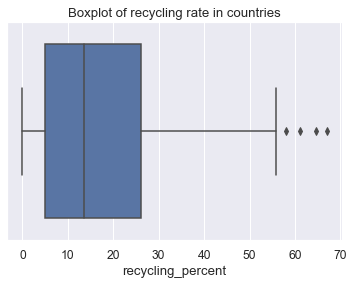

In [83]:
print('Number of countries with recycling rate according countries dataset:',len(countries_df_geo.loc[countries_df_geo.recycling_percent>0]),'.')
sns.boxplot(countries_df_geo.recycling_percent.loc[countries_df_geo.recycling_percent>0]).set_title('Boxplot of recycling rate in countries')

In [84]:
region_recycling_countries = pd.DataFrame(countries_df_geo_recycling.groupby('region')['recycling_percent'].count())
region_recycling_countries.rename(columns={'recycling_percent':'number_recycling_countries'},inplace=True)
region_recycling_countries['percent_recycling_countries'] = round(region_recycling_countries['number_recycling_countries']*100/countries_df_geo.groupby('region')['name'].count(),2)
region_recycling_countries

,number_recycling_countries,percent_recycling_countries
region,,
East Asia & Pacific,21,56.76
Europe & Central Asia,45,77.59
Latin America & Caribbean,18,45.00
Middle East & North Africa,16,76.19
North America,3,100.00
South Asia,4,50.00
Sub-Saharan Africa,17,35.42


In [85]:
recycl_countries_income_num = pd.DataFrame(countries_df_geo.loc[countries_df_geo['recycling_percent']>0].groupby('incomeLevel')['recycling_percent'].count())
recycl_countries_income_mean = pd.DataFrame(round(countries_df_geo.groupby('incomeLevel')['recycling_percent'].mean(),2))
recycl_countries_income_num.rename(columns={'recycling_percent':'num. recycling countries'},inplace=True)
recycl_countries_income_mean.rename(columns={'recycling_percent':'mean recycling percent by Income'},inplace=True)
recycl_countries_income_num['number of countries']=countries_df_geo.groupby('incomeLevel')['name'].count()
recycl_countries_income_num['percent_recycling_countries']=round(recycl_countries_income_num['num. recycling countries']*100/countries_df_geo.groupby('incomeLevel')['name'].count(),2)
recycl_countries_income = pd.concat([recycl_countries_income_num,recycl_countries_income_mean], axis=1, sort=False)
recycl_table = recycl_countries_income.sort_values(by='mean recycling percent by Income',ascending=False)

cm = sns.light_palette("green", as_cmap=True)
styled_recycling_table = recycl_table.style.background_gradient(cmap=cm)
styled_recycling_table


,num. recycling countries,number of countries,percent_recycling_countries,mean recycling percent by Income
incomeLevel,,,,
High income,59,78,75.64,19.58
Upper middle income,33,60,55,5.31
Lower middle income,22,47,46.81,5.07
Low income,10,30,33.33,2.35


In [86]:
plt.savefig('style_table.png', transparent=True)

<Figure size 432x288 with 0 Axes>

It would be 

In [87]:
import plotly.express as px

fig = px.scatter_geo(countries_df_geo.sort_values(by='NumIncome',ascending=False), lon = countries_df_geo['longitude'],
        lat = countries_df_geo['latitude'],text = countries_df_geo['percent_pop_dataset'], color=countries_df_geo['incomeLevel'],
                     hover_name=countries_df_geo['name'], size=countries_df_geo['population'],
                     projection="natural earth", color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Countries representation in countries dataset according to their population'
    )
fig.show()
fig.write_html("CountriesRepresentationAccPopulationCountriesDataset.html")



In [88]:
fig = px.scatter_geo(countries_df_geo, lon = countries_df_geo['longitude'],
        lat = countries_df_geo['latitude'], color="incomeLevel",
                     hover_name="name", size="MSW_generated_tons_year",
                     projection="natural earth", color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Countries global waste generation based on countries dataset'
    )
fig.show()

fig.write_html("total_waste_generated_countries.html")

In [89]:

fig = px.scatter_geo(countries_df_geo, lon = countries_df_geo['longitude'],
        lat = countries_df_geo['latitude'], color="gdp_inhab",
                     hover_name="name", size="Waste_by_country_inhabitant_kg_year",
                     projection="natural earth", text="gdp_inhab",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Waste generation by inhabitant based on countries dataset'
    )
fig.show()

fig.write_html("waste_by_inhab_countries_dataset.html")

In [90]:
countries_ordered_waste = countries_df_geo.sort_values(by="Waste_by_country_inhabitant_kg_year",ascending= False )
countries_ordered_waste = countries_ordered_waste.reset_index(drop=True)

In [118]:
countries_ordered_waste

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,...,NumIncome,WasteLog,PopLog,gdp_inhab_log,percent_pop_dataset,name,region,incomeLevel,longitude,latitude
0,ISL,ECS,HighIncome,0,1,1,0,330815.0,525000.00,2.86,...,4,7.370224,12.709318,10.813378,0.00,Iceland,Europe & Central Asia,High income,-21.89520,64.13530
1,VIR,LCN,HighIncome,0,1,1,1,105784.0,146500.00,0.00,...,4,7.234105,11.569164,10.488395,0.00,Virgin Islands (U.S.),Latin America & Caribbean,High income,-64.89630,18.33580
2,SGP,EAS,HighIncome,1,1,1,1,5607283.0,7704300.00,0.00,...,4,7.226194,15.539577,10.884720,0.08,Singapore,East Asia & Pacific,High income,103.85000,1.28941
3,BMU,NAC,HighIncome,1,1,1,0,64798.0,82000.00,18.30,...,4,7.143989,11.079045,10.488395,0.00,Bermuda,North America,High income,-64.70600,32.32930
4,FRO,ECS,HighIncome,0,0,1,0,48842.0,61000.00,0.00,...,4,7.130843,10.796366,10.488395,0.00,Faroe Islands,Europe & Central Asia,High income,-6.91181,61.89260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,ETH,SSF,LowIncome,0,1,1,0,99873033.0,6532786.97,0.00,...,1,4.195848,18.419410,6.263665,1.43,Ethiopia,Sub-Saharan Africa,Low income,38.74680,9.02274
211,NPL,SAS,LowIncome,0,1,1,1,28982771.0,1768977.49,2.87,...,1,4.127779,17.182212,6.531053,0.42,Nepal,South Asia,Low income,85.31570,27.69390
212,LAO,EAS,LowMiddleIncome,0,1,1,1,6663967.0,351900.00,0.00,...,2,3.985459,15.712226,7.418781,0.10,Lao PDR,East Asia & Pacific,Lower middle income,102.17700,18.58260
213,TLS,EAS,LowMiddleIncome,0,1,1,1,1268671.0,63875.00,0.00,...,2,3.938665,14.053481,7.995890,0.02,Timor-Leste,East Asia & Pacific,Lower middle income,125.56700,-8.56667


In [126]:
fig =px.bar(pd.concat([countries_ordered_waste.sort_values(by="Waste_by_country_inhabitant_kg_year",ascending= True).tail(25),countries_ordered_waste.sort_values(by="Waste_by_country_inhabitant_kg_year",ascending= True).head(5)]).sort_values(by="Waste_by_country_inhabitant_kg_year",ascending= True), x="Waste_by_country_inhabitant_kg_year", y="name", 
             orientation='h', hover_data=['population','incomeLevel','region'],color='Waste_by_country_inhabitant_kg_year',text='incomeLevel',
             width=1000, height=700,color_continuous_scale='Brwnyl')
fig.update_layout(
    title="25 countries with higher waste generation by inhabitant and the 5 countries with the lower one",
    xaxis_title="Waste generation by inhabitant (kg/year)",
    yaxis_title="Country",font=dict(size=11)
    )

fig.show()
fig.write_html("25CountriesHigherWasteGeneration5lower.html")

In [92]:
countries_twenty_higher_lower_waste_generation = pd.concat([countries_ordered_waste.head(20),countries_ordered_waste.tail(20)])
countries_twenty_higher_lower_waste_generation[['population','Waste_by_country_inhabitant_kg_year', 'name', 'region', 'incomeLevel',
       'longitude', 'latitude']]

,population,Waste_by_country_inhabitant_kg_year,name,region,incomeLevel,longitude,latitude
0,330815.0,1586.99,Iceland,Europe & Central Asia,High income,-21.895200,64.135300
1,105784.0,1384.90,Virgin Islands (U.S.),Latin America & Caribbean,High income,-64.896300,18.335800
2,5607283.0,1373.98,Singapore,East Asia & Pacific,High income,103.850000,1.289410
3,64798.0,1265.47,Bermuda,North America,High income,-64.706000,32.329300
4,48842.0,1248.93,Faroe Islands,Europe & Central Asia,High income,-6.911810,61.892600
5,37783.0,1217.48,Monaco,Europe & Central Asia,High income,7.418910,43.732500
6,3473181.0,1200.90,Puerto Rico,Latin America & Caribbean,High income,-66.000000,18.230000
7,3554108.0,1120.17,Moldova,Europe & Central Asia,Lower middle income,28.849700,47.016700
8,164541.0,1087.47,Channel Islands,Europe & Central Asia,High income,NaN,NaN
9,20645.0,1022.00,British Virgin Islands,Latin America & Caribbean,High income,-64.623056,18.431389


In [93]:
fig = px.bar(countries_twenty_higher_lower_waste_generation, x="Waste_by_country_inhabitant_kg_year", y="name", 
             orientation='h', hover_data=['population','incomeLevel','region'],color='Waste_by_country_inhabitant_kg_year',text='incomeLevel',
             width=1000, height=800,color_continuous_scale='Brwnyl')
fig.update_layout(
    title="20 countries with lower waste generation and 20 countries with higher waste generation by inhabitant according countries dataset",
    xaxis_title="Waste generation by inhabitant (kg/year)",
    yaxis_title="name",font=dict(size=11)
    )

fig.show()
fig.write_html("20CountriesHigherLowerWasteGeneration.html")

In [94]:
import plotly.express as px
fig = px.scatter_geo(countries_df_geo, lon = countries_df_geo['longitude'],
        lat = countries_df_geo['latitude'], color="incomeLevel",
                     hover_name="name", size="recycling_percent",
                     projection="natural earth",color_discrete_map={
                "Low income": "yellow",
                "Lower middle income": "orange",
                "Upper middle income": "red",
                "High income": "purple"
             })
fig.update_layout(
        title = 'Recycling rate based on countries dataset'
    )
fig.show()

fig.write_html("Map_recycling_rates.html")


In [95]:
"""Binary categorical variables converted to 0 (No) and 1 (yes):
'info_system_SW_mgmt','national_waste_agency','national_law_for_SW_mgmt','PPP_rules_and_regulations'"""

Waste_mgmt_regulations = pd.concat([countries_df_geo[['name','incomeLevel']].groupby('incomeLevel').count(),countries_df_geo[['info_system_SW_mgmt','national_waste_agency','national_law_for_SW_mgmt','PPP_rules_and_regulations','incomeLevel']].groupby('incomeLevel').sum()],axis=1)
Waste_mgmt_regulations

,name,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations
incomeLevel,,,,,
High income,78,34,68,73,43
Low income,30,0,10,18,10
Lower middle income,47,7,28,40,29
Upper middle income,60,23,41,44,33


In [96]:
Waste_mgmt_regulations.rename(columns={'name':'num. countries'},inplace=True)
Waste_mgmt_regulations

,num. countries,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations
incomeLevel,,,,,
High income,78,34,68,73,43
Low income,30,0,10,18,10
Lower middle income,47,7,28,40,29
Upper middle income,60,23,41,44,33


In [97]:
Waste_mgmt_regulations=Waste_mgmt_regulations.sort_values(by='info_system_SW_mgmt', ascending=True)
Waste_mgmt_regulations

,num. countries,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations
incomeLevel,,,,,
Low income,30,0,10,18,10
Lower middle income,47,7,28,40,29
Upper middle income,60,23,41,44,33
High income,78,34,68,73,43


In [98]:
Waste_mgmt_regulations=Waste_mgmt_regulations.append(Waste_mgmt_regulations.sum().rename('Total'))
Waste_mgmt_regulations

,num. countries,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations
incomeLevel,,,,,
Low income,30,0,10,18,10
Lower middle income,47,7,28,40,29
Upper middle income,60,23,41,44,33
High income,78,34,68,73,43
Total,215,64,147,175,115


In [99]:
percent_countries_waste_mgmt_regulations = Waste_mgmt_regulations

for x in ['info_system_SW_mgmt','national_waste_agency','national_law_for_SW_mgmt','PPP_rules_and_regulations']:
    percent_countries_waste_mgmt_regulations[x]=round(percent_countries_waste_mgmt_regulations[x]*100/percent_countries_waste_mgmt_regulations['num. countries'],2)
   
percent_countries_waste_mgmt_regulations  

,num. countries,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations
incomeLevel,,,,,
Low income,30,0.00,33.33,60.00,33.33
Lower middle income,47,14.89,59.57,85.11,61.70
Upper middle income,60,38.33,68.33,73.33,55.00
High income,78,43.59,87.18,93.59,55.13
Total,215,29.77,68.37,81.40,53.49


In [100]:
fig = go.Figure(data=[
    go.Bar(name='Information System for Waste Management', x=percent_countries_waste_mgmt_regulations.index, y=percent_countries_waste_mgmt_regulations['info_system_SW_mgmt'],text=percent_countries_waste_mgmt_regulations['info_system_SW_mgmt'],marker_color=px.colors.qualitative.Bold[0]),
    go.Bar(name='National waste agency', x=percent_countries_waste_mgmt_regulations.index, y=percent_countries_waste_mgmt_regulations['national_waste_agency'],text=percent_countries_waste_mgmt_regulations['national_waste_agency'],marker_color=px.colors.qualitative.Bold[1]),
    go.Bar(name='National law for waste Management', x=percent_countries_waste_mgmt_regulations.index, y=percent_countries_waste_mgmt_regulations['national_law_for_SW_mgmt'],text=percent_countries_waste_mgmt_regulations['national_law_for_SW_mgmt'],marker_color=px.colors.qualitative.Bold[2]),
    go.Bar(name='Public-Private Partnerships Rules and Regulations', x=percent_countries_waste_mgmt_regulations.index, y=percent_countries_waste_mgmt_regulations['PPP_rules_and_regulations'],text=percent_countries_waste_mgmt_regulations['PPP_rules_and_regulations'],marker_color=px.colors.qualitative.Bold[3])
])

fig.update_traces(texttemplate='%{text:.2s}', textposition='auto')

fig.update_layout(
    title='Percentage of countries with specific waste institutions and policies according country income level',
    xaxis= dict(title='Income Level',titlefont_size=14,tickfont_size=12),
    yaxis=dict(
        title='%',
        titlefont_size=14,
        tickfont_size=12,
    ),
    legend=dict(
        x=1.02,
        y=1.0,
),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)


fig.show()

fig.write_html("waste_institutions_perc_countries.html")


**waste composition**

In [101]:
Wcompo_countries_path = r'CountriesWasteComposition.csv'
Wcompo_cities_path = r'CitiesWasteComposition.csv'

Wcompo_countries = pd.read_csv(Wcompo_countries_path)
Wcompo_cities = pd.read_csv(Wcompo_cities_path)

In [102]:
Wcompo_countries.head()

,country_code,region_id,income_id,compo_organic,compo_glass,compo_metal,compo_other,compo_paper_cardboard,compo_plastic,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,MSW_generated_tons_year,compost_percent,recycling_percent,gdp_inhab
0,AGO,SSF,LowMiddleIncome,51.80,6.70,4.40,11.50,11.90,13.50,no,no,yes,yes,25096150.0,4.213644e+06,0.0,0.0,4105.90
1,ALB,ECS,MiddleUpperIncome,51.40,4.50,4.80,15.21,9.90,9.60,no,yes,yes,yes,2880703.0,1.142964e+06,0.0,0.0,4676.32
2,AND,ECS,HighIncome,31.20,8.20,2.60,11.60,35.10,11.30,no,yes,yes,yes,82431.0,4.300000e+04,0.0,0.0,40274.66
3,ARE,MEA,HighIncome,39.00,4.00,3.00,10.00,25.00,19.00,yes,yes,no,yes,9269612.0,5.413453e+06,9.0,20.0,41449.68
4,ARG,LCN,HighIncome,38.74,3.16,1.84,15.36,13.96,14.61,yes,no,yes,yes,42981515.0,1.791055e+07,0.0,6.0,10411.87


In [103]:
Wcompo_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
country_code                 159 non-null object
region_id                    159 non-null object
income_id                    159 non-null object
compo_organic                159 non-null float64
compo_glass                  159 non-null float64
compo_metal                  159 non-null float64
compo_other                  159 non-null float64
compo_paper_cardboard        159 non-null float64
compo_plastic                159 non-null float64
info_system_SW_mgmt          159 non-null object
national_waste_agency        159 non-null object
national_law_for_SW_mgmt     159 non-null object
PPP_rules_and_regulations    159 non-null object
population                   159 non-null float64
MSW_generated_tons_year      159 non-null float64
compost_percent              159 non-null float64
recycling_percent            159 non-null float64
gdp_inhab                    159 non-null float64
dt

In [104]:
Wcompo_cities.head()

,country_code,region_id,income_id,city_name,compo_organic,compo_glass,compo_metal,compo_other,compo_paper_cardboard,compo_plastic,...,primary_collection_form,separation_metals,separation_glass,separation_organic,separation_paper_cardboard,separation_plastics_packaging,separation_existence,MSW_generated_tons_year,waste_collection_coverage_percent,recycling_percent
0,AFG,SAS,LowIncome,Jalalabad,1.0455,1.1175,0.0175,84.854,0.080,5.6455,...,door to door,no,no,no,no,no,no,58914.45,0.0,0.0
1,AFG,SAS,LowIncome,Kandahar,11.6000,2.3110,0.1690,64.364,1.499,9.6430,...,centralized drop-off point,no,no,no,no,no,no,120971.00,0.0,0.0
2,AFG,SAS,LowIncome,Mazar-E-Sharif,50.5000,1.3200,0.3200,28.870,1.690,10.6400,...,centralized drop-off point,no,no,no,no,no,no,52368.40,0.0,0.0
3,AFG,SAS,LowIncome,Kabul,13.5000,1.0000,0.5000,63.000,5.000,11.0000,...,centralized drop-off point,no,no,no,no,no,no,1989250.00,75.0,0.0
4,AFG,SAS,LowIncome,HiratÂ,52.9400,1.4700,0.2300,23.050,3.670,12.0600,...,door to door,no,no,no,no,no,no,91644.70,0.0,0.0


In [105]:
Wcompo_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 27 columns):
country_code                              225 non-null object
region_id                                 225 non-null object
income_id                                 225 non-null object
city_name                                 225 non-null object
compo_organic                             225 non-null float64
compo_glass                               225 non-null float64
compo_metal                               225 non-null float64
compo_other                               225 non-null float64
compo_paper_cardboard                     225 non-null float64
compo_plastic                             225 non-null float64
IF_SW_mgmt_dept                           225 non-null object
IF_SW_mgmt_info                           225 non-null object
IF_SW_control_enforcing_unit              225 non-null object
LF_long_term_integrated_SW_master_plan    225 non-null object
LF_SW_master_plan_bei

**e-waste**

In [106]:
EWaste_path = r'CountriesEWaste.csv'
EWaste = pd.read_csv(EWaste_path)

In [107]:
EWaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):
country_code                 182 non-null object
region_id                    182 non-null object
income_id                    182 non-null object
info_system_SW_mgmt          182 non-null object
national_waste_agency        182 non-null object
national_law_for_SW_mgmt     182 non-null object
PPP_rules_and_regulations    182 non-null object
population                   182 non-null float64
SpW_e_waste_tons_year        182 non-null float64
MSW_generated_tons_year      182 non-null float64
gdp_inhab                    182 non-null float64
dtypes: float64(4), object(7)
memory usage: 15.8+ KB


In [108]:
EWaste.head()

,country_code,region_id,income_id,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,population,SpW_e_waste_tons_year,MSW_generated_tons_year,gdp_inhab
0,AFG,SAS,LowIncome,no,yes,yes,yes,34656032.0,20000.0,5.628525e+06,617.89
1,AGO,SSF,LowMiddleIncome,no,no,yes,yes,25096150.0,92000.0,4.213644e+06,4105.90
2,ALB,ECS,MiddleUpperIncome,no,yes,yes,yes,2880703.0,20000.0,1.142964e+06,4676.32
3,ARE,MEA,HighIncome,yes,yes,no,yes,9269612.0,134000.0,5.413453e+06,41449.68
4,ARG,LCN,HighIncome,yes,no,yes,yes,42981515.0,291700.0,1.791055e+07,10411.87


**medical_waste**

In [109]:
MedWaste_path = r'CountriesMedicalWaste.csv'
MedWaste = pd.read_csv(MedWaste_path)

In [110]:
MedWaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 22 columns):
country_code                        105 non-null object
region_id                           105 non-null object
income_id                           105 non-null object
compo_organic                       99 non-null float64
compo_glass                         95 non-null float64
compo_metal                         95 non-null float64
compo_other                         99 non-null float64
compo_paper_cardboard               98 non-null float64
compo_plastic                       98 non-null float64
info_system_SW_mgmt                 105 non-null object
national_waste_agency               105 non-null object
national_law_for_SW_mgmt            105 non-null object
PPP_rules_and_regulations           105 non-null object
population                          105 non-null float64
SpW_construction_waste_tons_year    57 non-null float64
SpW_e_waste_tons_year               100 non-null float

In [111]:
MedWaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 22 columns):
country_code                        105 non-null object
region_id                           105 non-null object
income_id                           105 non-null object
compo_organic                       99 non-null float64
compo_glass                         95 non-null float64
compo_metal                         95 non-null float64
compo_other                         99 non-null float64
compo_paper_cardboard               98 non-null float64
compo_plastic                       98 non-null float64
info_system_SW_mgmt                 105 non-null object
national_waste_agency               105 non-null object
national_law_for_SW_mgmt            105 non-null object
PPP_rules_and_regulations           105 non-null object
population                          105 non-null float64
SpW_construction_waste_tons_year    57 non-null float64
SpW_e_waste_tons_year               100 non-null float

**hazardous waste**

In [112]:
HazWaste_path = r'CountriesHazardousWaste.csv'
HazWaste = pd.read_csv(HazWaste_path)

In [113]:
HazWaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
country_code                     118 non-null object
region_id                        118 non-null object
income_id                        118 non-null object
info_system_SW_mgmt              118 non-null object
national_waste_agency            118 non-null object
national_law_for_SW_mgmt         118 non-null object
PPP_rules_and_regulations        118 non-null object
population                       118 non-null float64
SpW_hazardous_waste_tons_year    118 non-null float64
MSW_generated_tons_year          118 non-null float64
gdp_inhab                        118 non-null float64
dtypes: float64(4), object(7)
memory usage: 10.3+ KB


In [114]:
HazWaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
country_code                     118 non-null object
region_id                        118 non-null object
income_id                        118 non-null object
info_system_SW_mgmt              118 non-null object
national_waste_agency            118 non-null object
national_law_for_SW_mgmt         118 non-null object
PPP_rules_and_regulations        118 non-null object
population                       118 non-null float64
SpW_hazardous_waste_tons_year    118 non-null float64
MSW_generated_tons_year          118 non-null float64
gdp_inhab                        118 non-null float64
dtypes: float64(4), object(7)
memory usage: 10.3+ KB
